<a href="https://colab.research.google.com/github/rohansiddeshwara-stride/table_extractor/blob/main/Copy_of_Task_5_Structural_NER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install PyMuPDF=='1.22.5'


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 20.0 MB/s eta 0:00:00


In [ ]:
# pip install --upgrade pymupdf

In [ ]:
pip install pytesseract

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import fitz

In [ ]:
doc = fitz.open( "/content/Alabama_ACFR_2021.pdf")
page=doc[9]
zoom_x = 2.0  # horizontal zoom
zoom_y = 2.0  # vertical zoom
mat = fitz.Matrix(zoom_x, zoom_y)  # zoom factor 2 in each dimension
pix = page.get_pixmap(matrix=mat)  # use 'mat' instead of the identity matrix  # iterate through the pages
pix.save("page-%i.png" % page.number)


In [ ]:
doc.metadata

{'format': 'PDF 1.7',
 'title': '',
 'author': '',
 'subject': '',
 'keywords': '',
 'creator': '',
 'producer': 'PDFlib+PDI 9.0.5 (.NET/Win64)',
 'creationDate': 'D:20211122105702Z',
 'modDate': '',
 'trapped': '',
 'encryption': None}

In [ ]:
import fitz  # import the bindings
fname = '/content/sample.pdf'  # get filename from command line

doc = fitz.open(fname)  # open document
for page in doc:
    zoom_x = 2.0  # horizontal zoom
    zoom_y = 2.0  # vertical zoom
    mat = fitz.Matrix(zoom_x, zoom_y)  # zoom factor 2 in each dimension
    pix = page.get_pixmap(matrix=mat)  # use 'mat' instead of the identity matrix  # iterate through the pages
    pix.save("page-%i.png" % page.number)


In [ ]:
import cv2
import numpy as np

# Read image.
img = cv2.imread('/content/page-4.png', cv2.IMREAD_COLOR)


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# cv2_imshow(gray)
blur = cv2.medianBlur(gray, 21)
# cv2_imshow(blur)

thresh= cv2.threshold(blur, 250, 255, cv2.THRESH_BINARY_INV)[1]

# cv2_imshow(thresh)

# Adjusts the brightness by adding 10 to each pixel value
brightness = 10
# Adjusts the contrast by scaling the pixel values by 2.3
contrast = 2.3
sharpen = cv2.addWeighted(thresh, contrast, np.zeros(thresh.shape, thresh.dtype), 0, brightness)
# cv2_imshow(sharpen)

# Apply Hough transform on the blurred image.
detected_circles = cv2.HoughCircles(sharpen,
                   cv2.HOUGH_GRADIENT, 1, 20, param1 = 50,
               param2 = 30, minRadius = 20, maxRadius = 200)

min_radius_thresh=50

# Draw circles that are detected.
if detected_circles is not None:

    # Convert the circle parameters a, b and r to integers.
    detected_circles = np.uint16(np.around(detected_circles))

    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]
        if r > min_radius_thresh:
          # Draw the circumference of the circle.
          cv2.circle(img, (a, b), r, (0, 255, 0), 5)

          # Draw a small circle (of radius 1) to show the center.
          cv2.circle(img, (a, b), 1, (0, 0, 255), 3)

cv2_imshow(img)


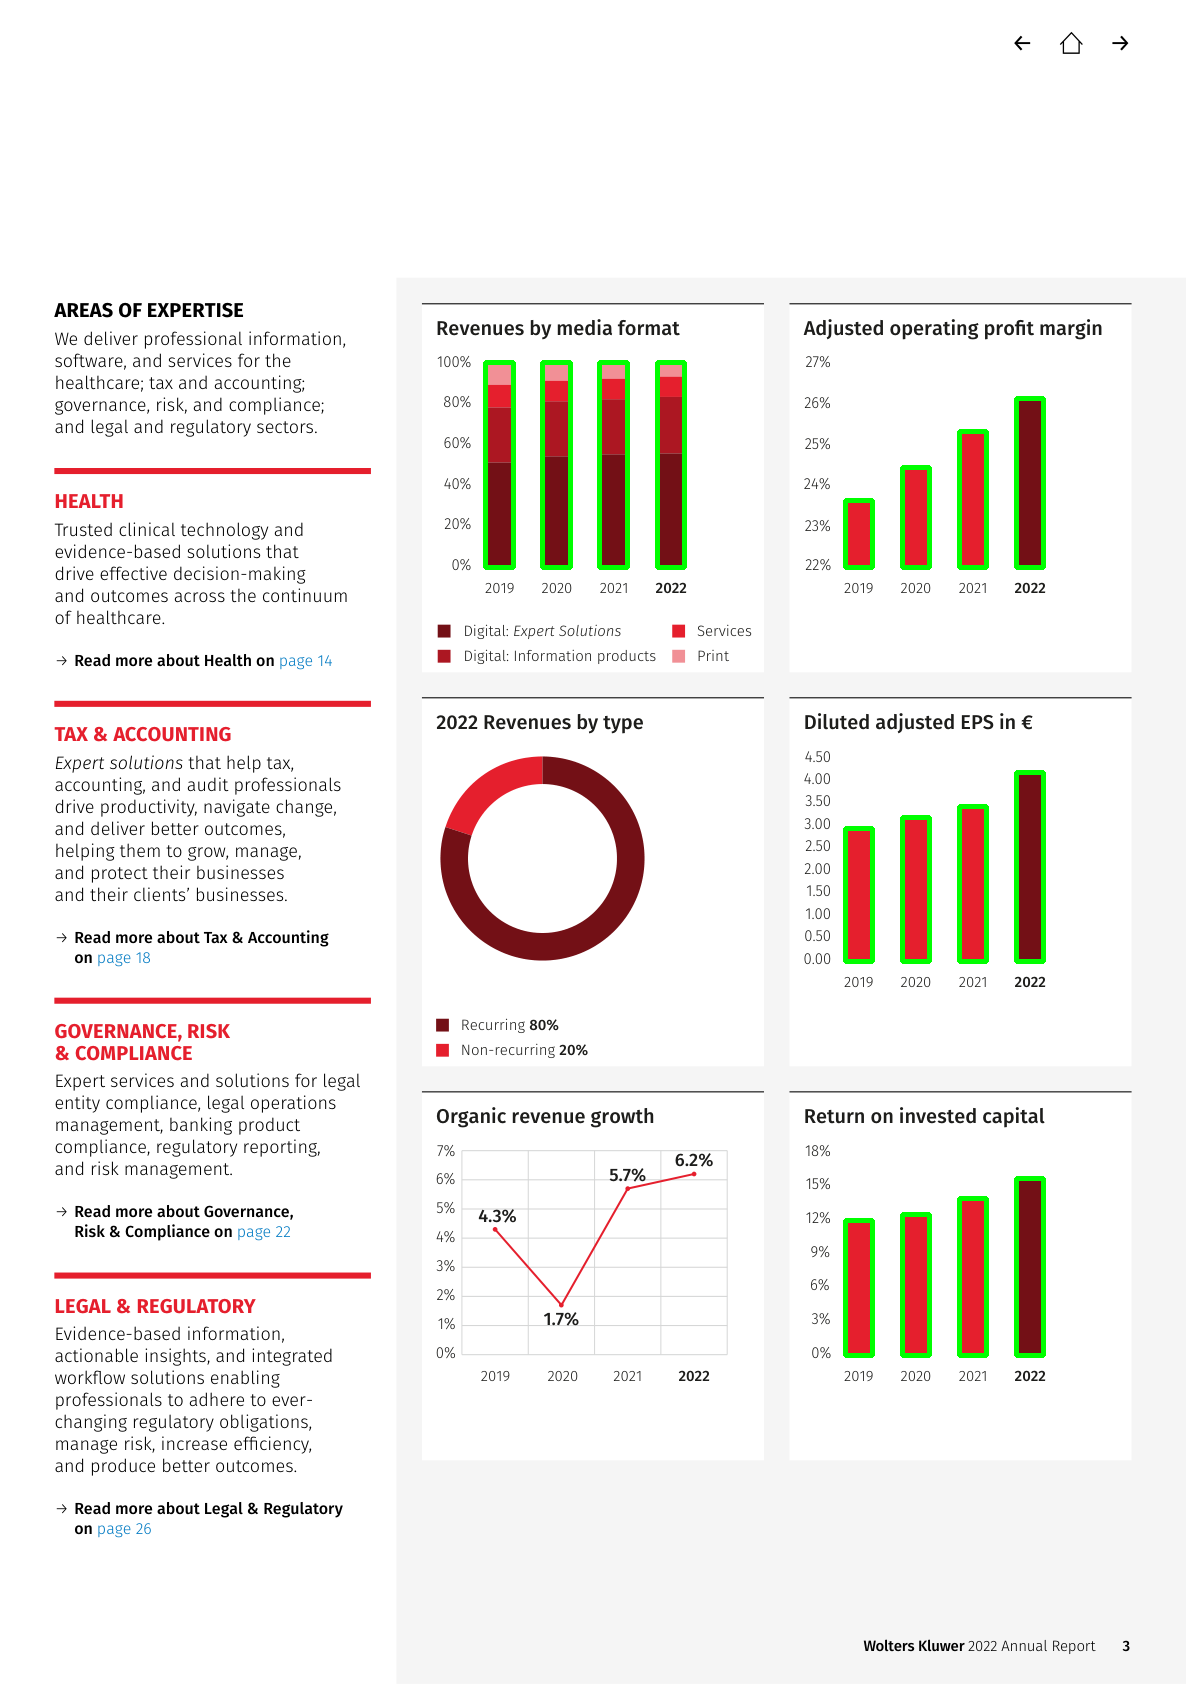

In [ ]:
import cv2

# Load the image
img = cv2.imread('/content/page-4.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# cv2_imshow(gray)

blur = cv2.medianBlur(gray, 21)
# cv2_imshow(blur)

thresh= cv2.threshold(blur, 200, 255, cv2.THRESH_BINARY_INV)[1]

# cv2_imshow(thresh)

# Adjusts the brightness by adding 10 to each pixel value
brightness = 10
# Adjusts the contrast by scaling the pixel values by 2.3
contrast = 2.3
sharpen = cv2.addWeighted(thresh, contrast, np.zeros(thresh.shape, thresh.dtype), 0, brightness)
# cv2_imshow(sharpen)


# Apply edge detection
edges = cv2.Canny(sharpen, threshold1=130, threshold2=200)
# cv2_imshow(edges)


# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


# # Filter and analyze contours
# for contour in contours:
#     # Filter out small contours based on area
#     if cv2.contourArea(contour) > min_area_threshold:
#         # Perform shape analysis to determine if it's a bar chart
#         # Draw a bounding box around the detected object
#         x, y, w, h = cv2.boundingRect(contour)
#         cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Define the minimum aspect ratio for a bar chart
min_aspect_ratio = 1  # Adjust this value based on your needs
min_area_threshold=0
# Filter and analyze contours
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)

    # Calculate the aspect ratio
    aspect_ratio = float(w) / h
    area = (w*h)

    # Perform classification based on aspect ratio
    if aspect_ratio < min_aspect_ratio and area > min_area_threshold :
        # Draw a bounding box around the detected bar chart
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)


# Display the result
cv2_imshow(img)



In [ ]:
import fitz  # PyMuPDF

# Open the PDF file
pdf_path = '/content/sample.pdf'
pdf_document = fitz.open(pdf_path)



# Iterate through each page in the PDF
for page_number in range(pdf_document.page_count):
  page = pdf_document[page_number]

  for i in page.get_text('blocks'):

    height = (i[3]-i[1])
    width = (i[2]-i[0])
    if len(i[4].split())>4 and len(i[4])>80:
      page.draw_rect(i[0:4],color=(0,1,0),width=2)
    # elif len(i[4]) < 80 and height>11.5 :
    #   page.draw_rect(i[0:4],color=(1,0,0),width=2)

  zoom_x = 2.0  # horizontal zoom
  zoom_y = 2.0  # vertical zoom
  mat = fitz.Matrix(zoom_x, zoom_y)  # zoom factor 2 in each dimension
  pix = page.get_pixmap(matrix=mat)  # use 'mat' instead of the identity matrix  # iterate through the pages
  pix.save("page-%i.png" % page.number)

# # Extract text from the page
# text = page.get_text("text")

# # Append the extracted text to the result string
# extracted_text += text
# # break
# output_path = 'output.pdf'
# pdf_document.save(output_path)
# Close the PDF document
pdf_document.close()



In [ ]:
import fitz  # PyMuPDF

# Open the PDF file
pdf_path = '/content/sample.pdf'
pdf_document = fitz.open(pdf_path)

# Initialize an empty string to store extracted text
extracted_text = ""

# Iterate through each page in the PDF
# for page_number in range(pdf_document.page_count):
page = pdf_document[9]
exp_y = 0
delta = 50
l = []
ll = page.get_text('blocks',sort=True)
for j,i in enumerate(page.get_text('blocks',sort=True)):
  height = (i[3]-i[1])
  width = (i[2]-i[0])
  if len(i[4].split())<80 and len(i[4].split()) >=2:
   y0=i[1]
   y1=i[3]
   if  y0<= exp_y + delta:
    if ll[j - 1] not in l:
      l.append(ll[j - 1])
    if ll[j] not in l:
      l.append(ll[j])
    # page.draw_rect(i[0:4],color=(0,1,0),width=2)
    # print(i[-2])
   exp_y =y1
for x in l:
    page.draw_rect(x[0:4],color=(0,1,0),width=2)

zoom_x = 2.0  # horizontal zoom
zoom_y = 2.0  # vertical zoom
mat = fitz.Matrix(zoom_x, zoom_y)  # zoom factor 2 in each dimension
pix = page.get_pixmap(matrix=mat)  # use 'mat' instead of the identity matrix  # iterate through the pages
pix.save("page100.png" )

In [ ]:
l

[(27.194408416748047,
  298.5619812011719,
  559.8742065429688,
  309.38397216796875,
  'performance indicators\n2023 guidance\n2022 actual\n',
  20,
  0),
 (27.194408416748047,
  316.55279541015625,
  559.8663940429688,
  327.80877685546875,
  'Adjusted operating profit margin (%)\n26.1‑26.5\n26.1\n',
  21,
  0),
 (27.18638801574707,
  331.12078857421875,
  559.8584594726562,
  342.37677001953125,
  'Adjusted free cash flow (€ million)\nAround 1,200\n1,220\n',
  22,
  0),
 (27.17839241027832,
  345.68878173828125,
  559.8504028320312,
  356.94476318359375,
  'ROIC (%)\nAround 16.5‑17.0\n15.5\n',
  23,
  0),
 (27.17039680480957,
  360.25677490234375,
  559.8414916992188,
  371.51275634765625,
  'Diluted adjusted EPS\nHigh single‑digit growth\n8% growth\n',
  24,
  0),
 (210.97401428222656,
  609.6727294921875,
  337.09405517578125,
  625.1326904296875,
  '2023 OUTLOOK BY DIVISION\n',
  10,
  0),
 (210.97401428222656,
  626.8927001953125,
  241.18402099609375,
  641.9526977539062,
  'He

In [ ]:
#rohan
import fitz  # PyMuPDF

# Open the PDF file
pdf_path = '/content/sample.pdf'
pdf_document = fitz.open(pdf_path)

# Initialize an empty string to store extracted text
extracted_text = ""

# Iterate through each page in the PDF
# for page_number in range(pdf_document.page_count):
page = pdf_document[9]
exp_y = 0
delta = 20
table_list=[]

for j,i in enumerate(page.get_text('blocks',sort=True)):
  height = (i[3]-i[1])
  width = (i[2]-i[0])
  table_list.append(i)
  if height < 50 and len(i[4].split())<20:
   y0=i[1]
   y1=i[3]
   if  y0<= exp_y + delta:
    l.append(ll[j - 1])
    l.append(ll[j])
    # page.draw_rect(i[0:4],color=(0,1,0),width=2)
    print(i[-2])
   exp_y =y1
for x in l:
    page.draw_rect(x[0:4],color=(0,1,0),width=2)

zoom_x = 2.0  # horizontal zoom
zoom_y = 2.0  # vertical zoom
mat = fitz.Matrix(zoom_x, zoom_y)  # zoom factor 2 in each dimension
pix = page.get_pixmap(matrix=mat)  # use 'mat' instead of the identity matrix  # iterate through the pages
pix.save("page100.png" )

2
21
22
23
24
11


In [ ]:
import fitz  # PyMuPDF

# Open the PDF file
pdf_path = '/content/Wolters-Kluwer-2022-Annual Report-1.pdf'
pdf_document = fitz.open(pdf_path)

# Initialize an empty string to store extracted text
extracted_text = ""

# Iterate through each page in the PDF
# for page_number in range(pdf_document.page_count):
page = pdf_document[9]

for i in page.get_text('words',sort=True):
  print(i)

In [ ]:
import pandas as pd

In [ ]:
import functools

In [ ]:
import fitz  # PyMuPDF

# Open the PDF file
pdf_path = '/content/Wolters-Kluwer-2022-Annual Report-1.pdf'
pdf_document = fitz.open(pdf_path)

# List to store extracted text blocks
text_blocks = []

# Choose the page number you want to process
page_number = 9  # Replace with the desired page number
page = pdf_document[page_number]

# Extract and process each text block
word_list= page.get_text('blocks', sort=True)
print(word_list)
df=pd.DataFrame(word_list)
# Close the PDF document

pdf_document.close()

df

[(27.194408416748047, 12.28984260559082, 565.7772216796875, 29.773841857910156, '←            →\nStrategic Report  |  Governance  |  Financial Statements\n', 2, 0), (27.19450569152832, 41.75309371948242, 228.4945068359375, 122.12308502197266, '2023 full-year  \noutlook\n', 19, 0), (27.194408416748047, 133.3179168701172, 564.3145751953125, 254.39788818359375, 'Our specific guidance for 2023 is provided below. We expect full‑year organic \ngrowth to be in line with the prior year and the adjusted operating profit margin \nto improve. In the first and second quarters of 2023, organic growth is expected \nto be slower compared to the prior year period, most notably in Health and \nGovernance, Risk & Compliance. The adjusted operating profit margin is expected \nto decline in the first half.\n', 26, 0), (27.194408416748047, 298.5619812011719, 559.8742065429688, 309.38397216796875, 'performance indicators\n2023 guidance\n2022 actual\n', 20, 0), (27.194408416748047, 316.55279541015625, 559.86

,0,1,2,3,4,5,6
0,27.194408,12.289843,565.777222,29.773842,← →\nStrategic Report | Governanc...,2,0
1,27.194506,41.753094,228.494507,122.123085,2023 full-year \noutlook\n,19,0
2,27.194408,133.317917,564.314575,254.397888,Our specific guidance for 2023 is provided bel...,26,0
3,27.194408,298.561981,559.874207,309.383972,performance indicators\n2023 guidance\n2022 ac...,20,0
4,27.194408,316.552795,559.866394,327.808777,Adjusted operating profit margin (%)\n26.1‑26....,21,0
5,27.186388,331.120789,559.858459,342.376770,"Adjusted free cash flow (€ million)\nAround 1,...",22,0
6,27.178392,345.688782,559.850403,356.944763,ROIC (%)\nAround 16.5‑17.0\n15.5\n,23,0
7,27.170397,360.256775,559.841492,371.512756,Diluted adjusted EPS\nHigh single‑digit growth...,24,0
8,27.194408,379.143738,541.077759,398.696228,Guidance for adjusted operating profit margin ...,25,0
9,394.753510,419.807739,472.703461,434.867737,Tax & Accounting\n,13,0


In [ ]:

# Initialize data structures to store table information
table_rows = {}  # Dictionary to store rows with columns
table_headers = []  # List to store header text blocks

# Iterate through text blocks and organize into rows and columns
for block in text_blocks:
    x0, y0, x1, y1, text, block_type = block

    # Group blocks by y-coordinates to identify rows
    if y0 in table_rows:
        table_rows[y0].append((x0, x1, text, block_type))
    else:
        table_rows[y0] = [(x0, x1, text, block_type)]

    # Store header blocks
    if block_type == 0:  # Replace with appropriate block type for headers
        table_headers.append(block)

# Analyze and process the identified rows and columns to detect tables
# You can check alignment, spacing, and block types to infer table structure

# Example: Printing detected rows and their columns
for y, row in table_rows.items():
    row_text = [block[2] for block in row]
    print("Row at y =", y, ":", row_text)

# Example: Printing detected headers
header_text = [block[4] for block in table_headers]
print("Table Header:", header_text)

Row at y = 12.28984260559082 : ['←            →\nStrategic Report  |  Governance  |  Financial Statements\n']
Row at y = 41.75309371948242 : ['2023 full-year  \noutlook\n']
Row at y = 133.3179168701172 : ['Our specific guidance for 2023 is provided below. We expect full‑year organic \ngrowth to be in line with the prior year and the adjusted operating profit margin \nto improve. In the first and second quarters of 2023, organic growth is expected \nto be slower compared to the prior year period, most notably in Health and \nGovernance, Risk & Compliance. The adjusted operating profit margin is expected \nto decline in the first half.\n']
Row at y = 298.5619812011719 : ['performance indicators\n2023 guidance\n2022 actual\n']
Row at y = 316.55279541015625 : ['Adjusted operating profit margin (%)\n26.1‑26.5\n26.1\n']
Row at y = 331.12078857421875 : ['Adjusted free cash flow (€ million)\nAround 1,200\n1,220\n']
Row at y = 345.68878173828125 : ['ROIC (%)\nAround 16.5‑17.0\n15.5\n']
Row at y

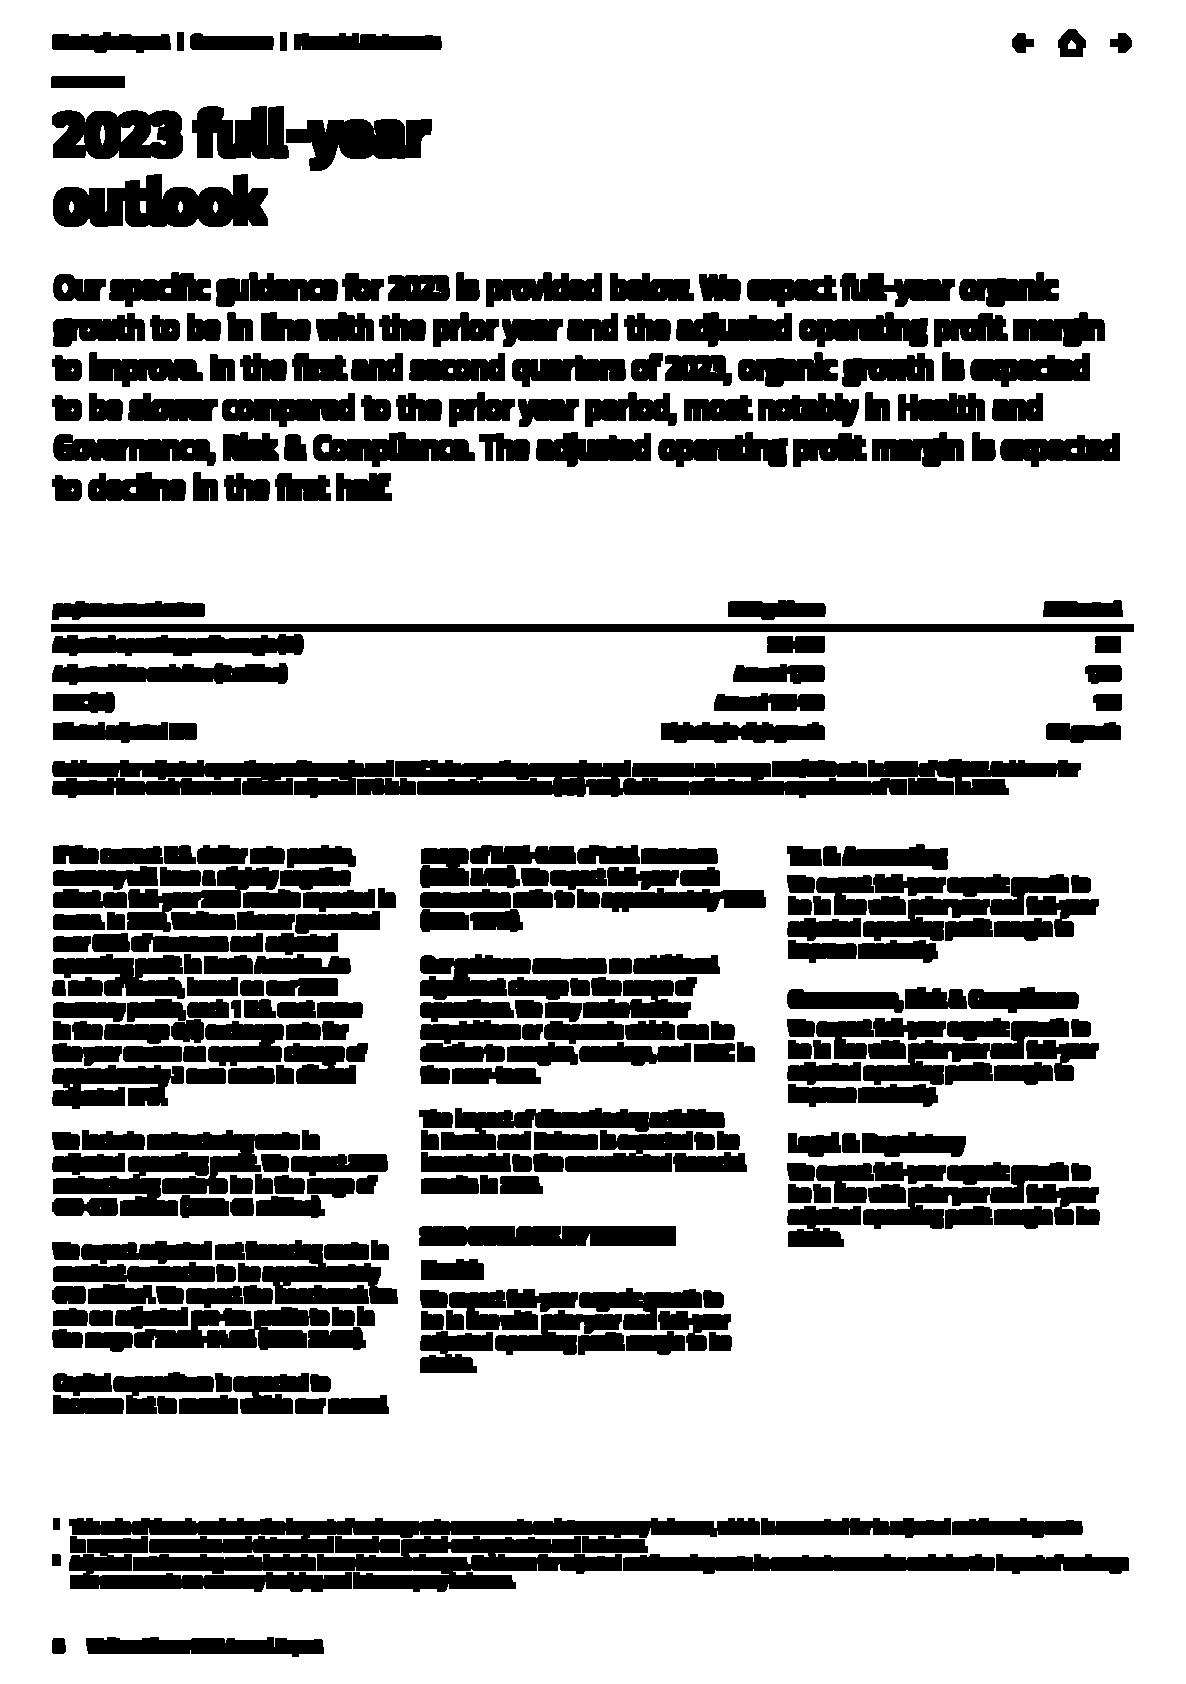

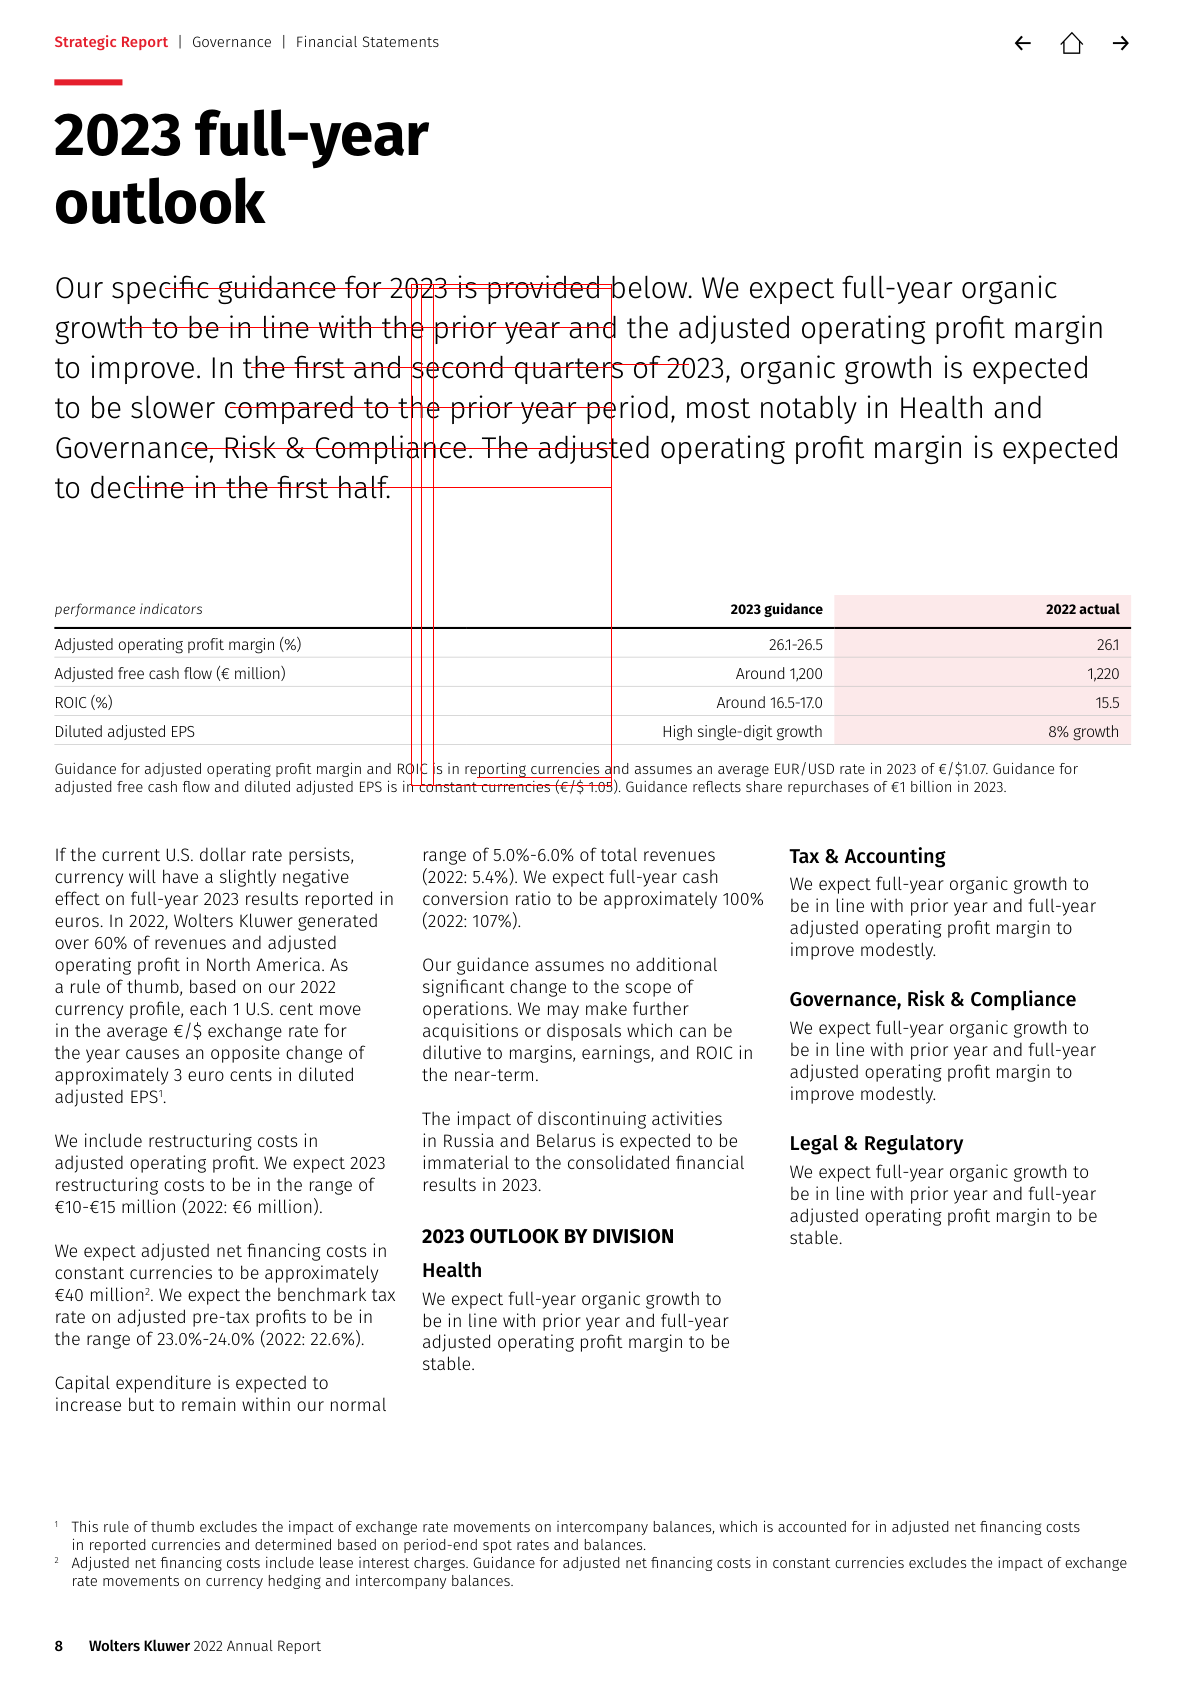

In [ ]:
import os
import cv2
import imutils

# This only works if there's only one table on a page
# Important parameters:
#  - morph_size
#  - min_text_height_limit
#  - max_text_height_limit
#  - cell_threshold
#  - min_columns


def pre_process_image(img, morph_size=(7, 7)):

    # get rid of the color
    pre = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Otsu threshold
    pre = cv2.threshold(pre, 250, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    # dilate the text to make it solid spot
    cpy = pre.copy()
    struct = cv2.getStructuringElement(cv2.MORPH_RECT, morph_size)
    cpy = cv2.dilate(~cpy, struct, anchor=(-1, -1), iterations=1)
    pre = ~cpy

    cv2_imshow(pre)
    return pre


def find_text_boxes(pre, min_text_height_limit=4, max_text_height_limit=10):
    # Looking for the text spots contours
    # OpenCV 3
    # img, contours, hierarchy = cv2.findContours(pre, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    # OpenCV 4
    contours, hierarchy = cv2.findContours(pre, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # Getting the texts bounding boxes based on the text size assumptions
    boxes = []
    for contour in contours:
        box = cv2.boundingRect(contour)
        h = box[3]

        if min_text_height_limit < h < max_text_height_limit:
            boxes.append(box)

    return boxes


def find_table_in_boxes(boxes, cell_threshold=5, min_columns=2):
    rows = {}
    cols = {}

    # Clustering the bounding boxes by their positions
    for box in boxes:
        (x, y, w, h) = box
        col_key = x // cell_threshold
        row_key = y // cell_threshold
        cols[row_key] = [box] if col_key not in cols else cols[col_key] + [box]
        rows[row_key] = [box] if row_key not in rows else rows[row_key] + [box]

    # Filtering out the clusters having less than 2 cols
    table_cells = list(filter(lambda r: len(r) >= min_columns, rows.values()))
    # Sorting the row cells by x coord
    table_cells = [list(sorted(tb)) for tb in table_cells]
    # Sorting rows by the y coord
    table_cells = list(sorted(table_cells, key=lambda r: r[0][1]))

    return table_cells


def build_lines(table_cells):
    if table_cells is None or len(table_cells) <= 0:
        return [], []

    max_last_col_width_row = max(table_cells, key=lambda b: b[-1][2])
    max_x = max_last_col_width_row[-1][0] + max_last_col_width_row[-1][2]

    max_last_row_height_box = max(table_cells[-1], key=lambda b: b[3])
    max_y = max_last_row_height_box[1] + max_last_row_height_box[3]

    hor_lines = []
    ver_lines = []

    for box in table_cells:
        x = box[0][0]
        y = box[0][1]
        hor_lines.append((x, y, max_x, y))

    for box in table_cells[0]:
        x = box[0]
        y = box[1]
        ver_lines.append((x, y, x, max_y))

    (x, y, w, h) = table_cells[0][-1]
    ver_lines.append((max_x, y, max_x, max_y))
    (x, y, w, h) = table_cells[0][0]
    hor_lines.append((x, max_y, max_x, max_y))

    return hor_lines, ver_lines


if __name__ == "__main__":
    in_file = os.path.join("/content/page-9.png")


    img = cv2.imread(os.path.join(in_file))

    pre_processed = pre_process_image(img)
    text_boxes = find_text_boxes(pre_processed)
    cells = find_table_in_boxes(text_boxes)
    hor_lines, ver_lines = build_lines(cells)

    # Visualize the result
    vis = img.copy()

    # for box in text_boxes:
    #     (x, y, w, h) = box
    #     cv2.rectangle(vis, (x, y), (x + w - 2, y + h - 2), (0, 255, 0), 1)

    for line in hor_lines:
        [x1, y1, x2, y2] = line
        cv2.line(vis, (x1, y1), (x2, y2), (0, 0, 255), 1)

    for line in ver_lines:
        [x1, y1, x2, y2] = line
        cv2.line(vis, (x1, y1), (x2, y2), (0, 0, 255), 1)

    cv2_imshow(vis)

In [ ]:
import numpy as np

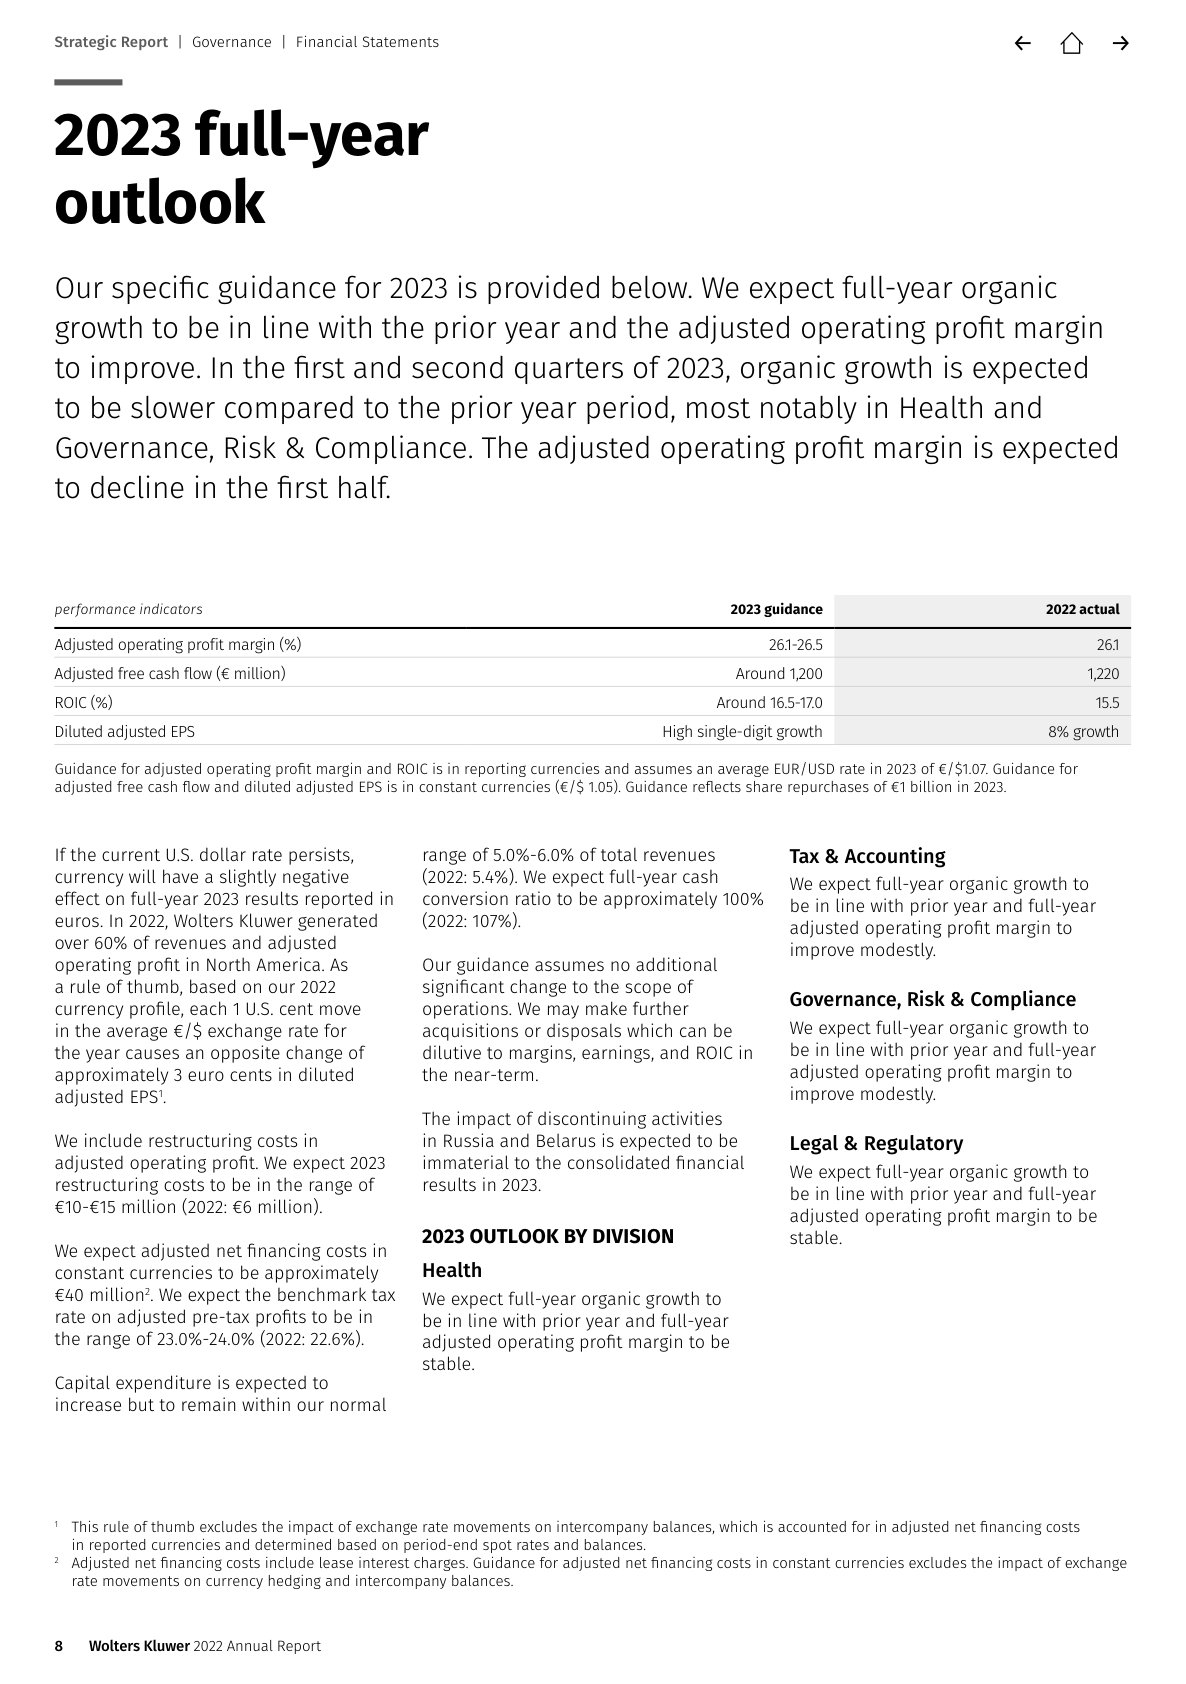

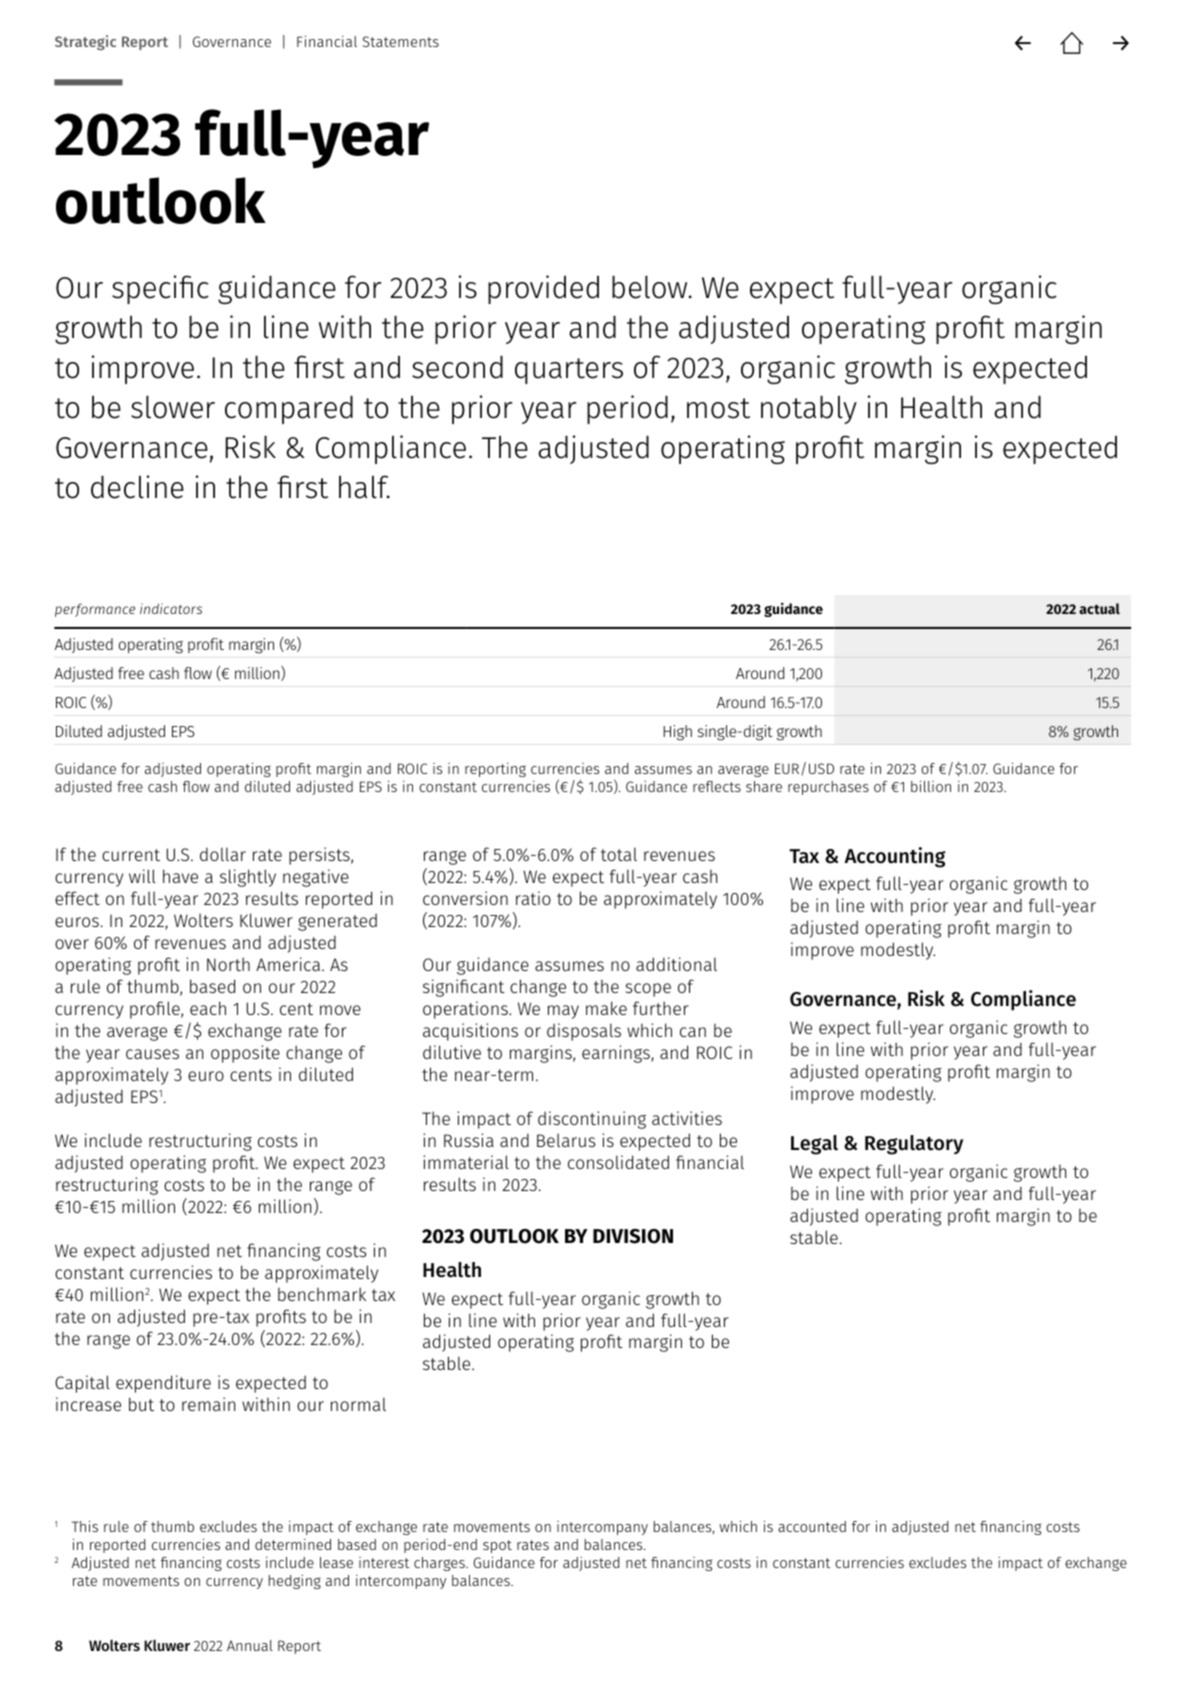

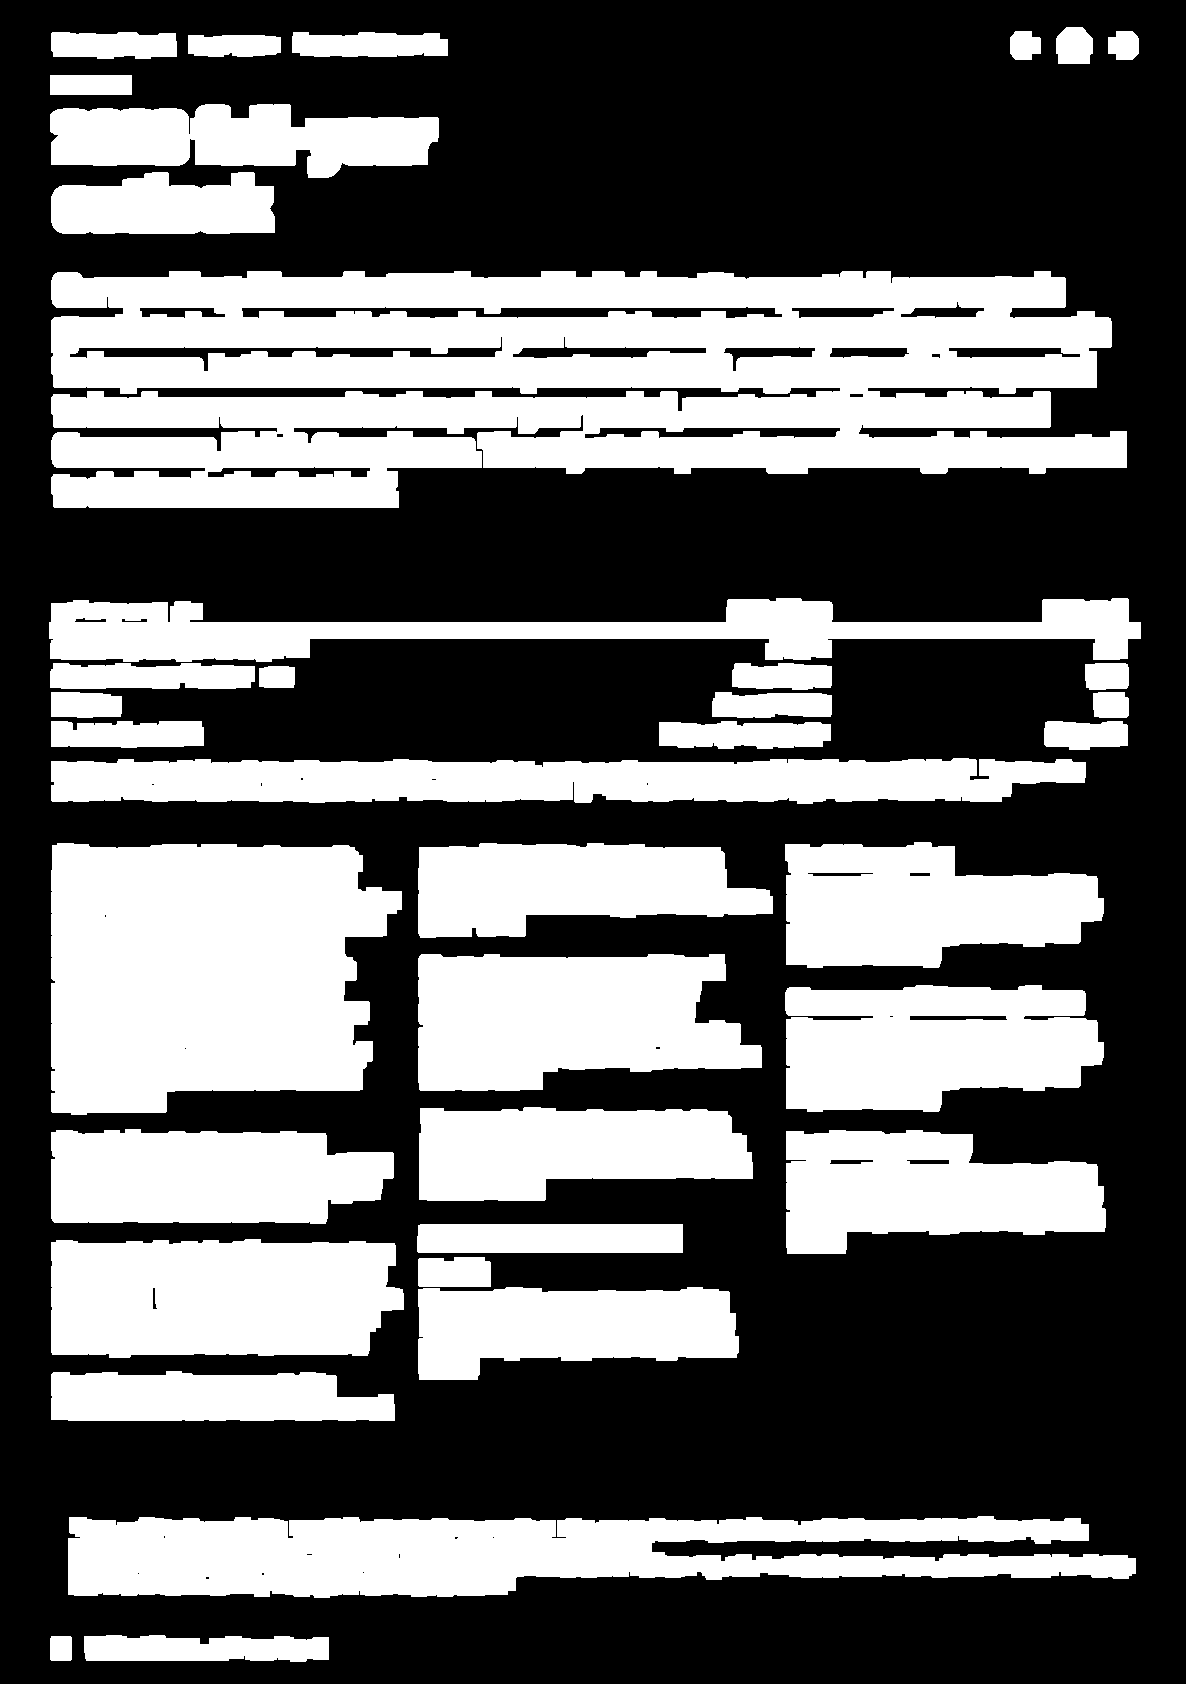

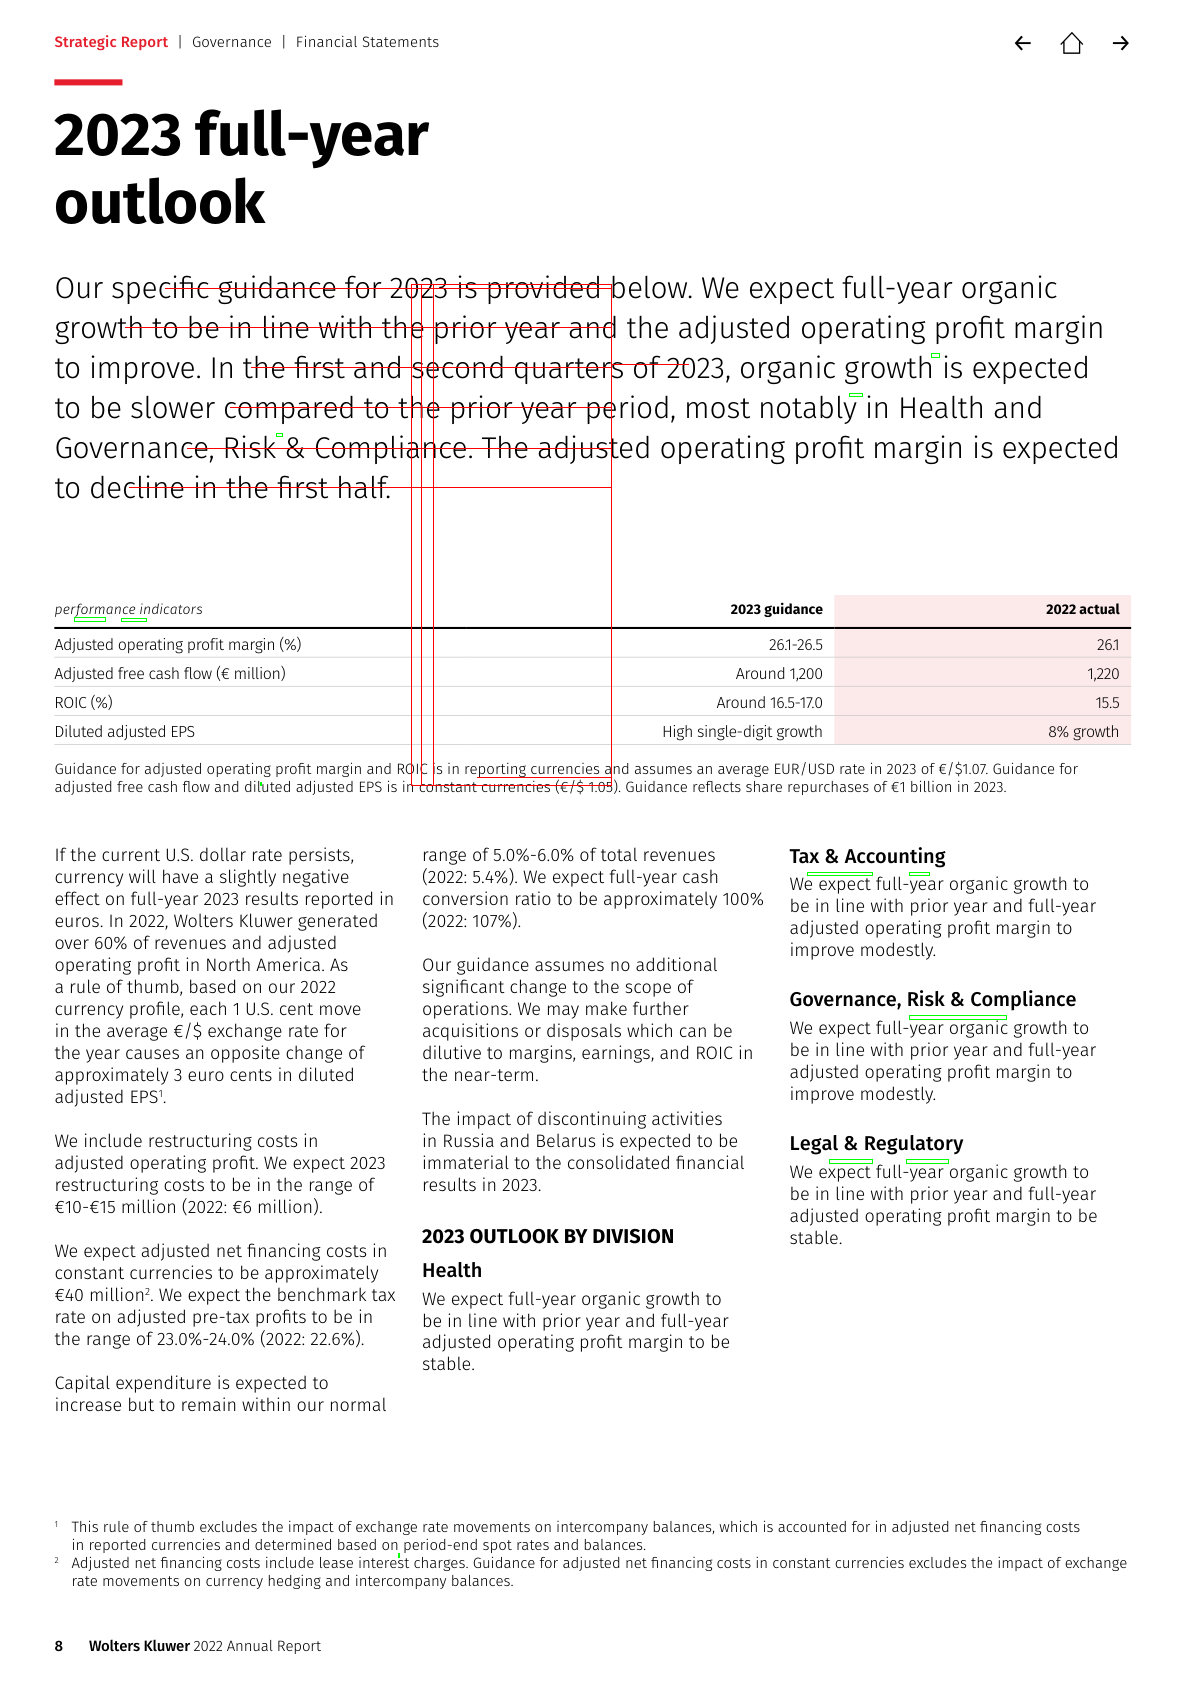

In [ ]:
in_file = os.path.join("/content/page-9.png")
img = cv2.imread(os.path.join(in_file))
pre = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(pre)
blur = cv2.GaussianBlur(pre, (3, 3), 0)
cv2_imshow(blur)
ret, thresh1 = cv2.threshold(blur, 150, 255, cv2.THRESH_BINARY)
bitwise = cv2.bitwise_not(thresh1)
erosion = cv2.erode(bitwise, np.ones((1, 1) ,np.uint8), iterations=5)
dilation = cv2.dilate(erosion, np.ones((4, 4) ,np.uint8), iterations=5)
cv2_imshow(dilation)
text_boxes=find_text_boxes(dilation)
for box in text_boxes:
    (x, y, w, h) = box
    cv2.rectangle(vis, (x, y), (x + w - 2, y + h - 2), (0, 255, 0), 1)
cv2_imshow(vis)

In [ ]:
pip install "paddleocr>=2.0.1"

In [ ]:
!pip install paddleocr --upgrade
!pip install paddlepaddle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.1/466.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 64.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.4/148.4 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.9/124.9 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.2/383.2 kB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.9 MB/s eta 0:00:00


In [ ]:
import cv2
import pandas as pd
from paddleocr import PPStructure

table_engine = PPStructure(recovery=True, return_ocr_result_in_table=True)


img_path = '/content/page-7.png'
img = cv2.imread(img_path)
result = table_engine(img)

for line in result:
    line.pop('img')
    if line.get("type") == "table":
        html_table = line.get("res").get("html")
        html_data = pd.read_html(html_table)
        pd.DataFrame(html_data[0])

Error: Can not import paddle core while this file exists: /usr/local/lib/python3.10/dist-packages/paddle/fluid/libpaddle.so


ImportError: ignored

In [ ]:
!wget http://nz2.archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2.19_amd64.deb

!dpkg -i libssl1.1_1.1.1f-1ubuntu2.19_amd64.deb

--2023-08-24 14:05:25--  http://nz2.archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2.19_amd64.deb
Resolving nz2.archive.ubuntu.com (nz2.archive.ubuntu.com)... 91.189.91.81, 185.125.190.39, 91.189.91.83, ...
Connecting to nz2.archive.ubuntu.com (nz2.archive.ubuntu.com)|91.189.91.81|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1321244 (1.3M) [application/vnd.debian.binary-package]
Saving to: ‘libssl1.1_1.1.1f-1ubuntu2.19_amd64.deb’

libssl1.1_1.1.1f-1u 100%[===================>]   1.26M  5.93MB/s    in 0.2s    

2023-08-24 14:05:25 (5.93 MB/s) - ‘libssl1.1_1.1.1f-1ubuntu2.19_amd64.deb’ saved [1321244/1321244]

Selecting previously unselected package libssl1.1:amd64.
(Reading database ... 120831 files and directories currently installed.)
Preparing to unpack libssl1.1_1.1.1f-1ubuntu2.19_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.19) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.19) ...
Processing triggers for libc-bin (2.3

In [ ]:
from PIL import Image

In [108]:
import fitz
doc = fitz.open( "/content/Alabama_ACFR_2021 (1).pdf")
page=doc[15]
zoom_x = 2.0  # horizontal zoom
zoom_y = 2.0  # vertical zoom
mat = fitz.Matrix(zoom_x, zoom_y)  # zoom factor 2 in each dimension
pix = page.get_pixmap(matrix=mat)  # use 'mat' instead of the identity matrix  # iterate through the pages
pix.save("page-%i.png" % page.number)


In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 38.6 MB/s eta 0:00:00


In [ ]:
pip install timm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.4 MB/s eta 0:00:00


In [ ]:
pip install tabula-py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 23.6 MB/s eta 0:00:00


Some weights of the model checkpoint at TahaDouaji/detr-doc-table-detection were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Detected table with confidence 0.976 at location [94.97, 394.29, 1122.57, 1426.92]


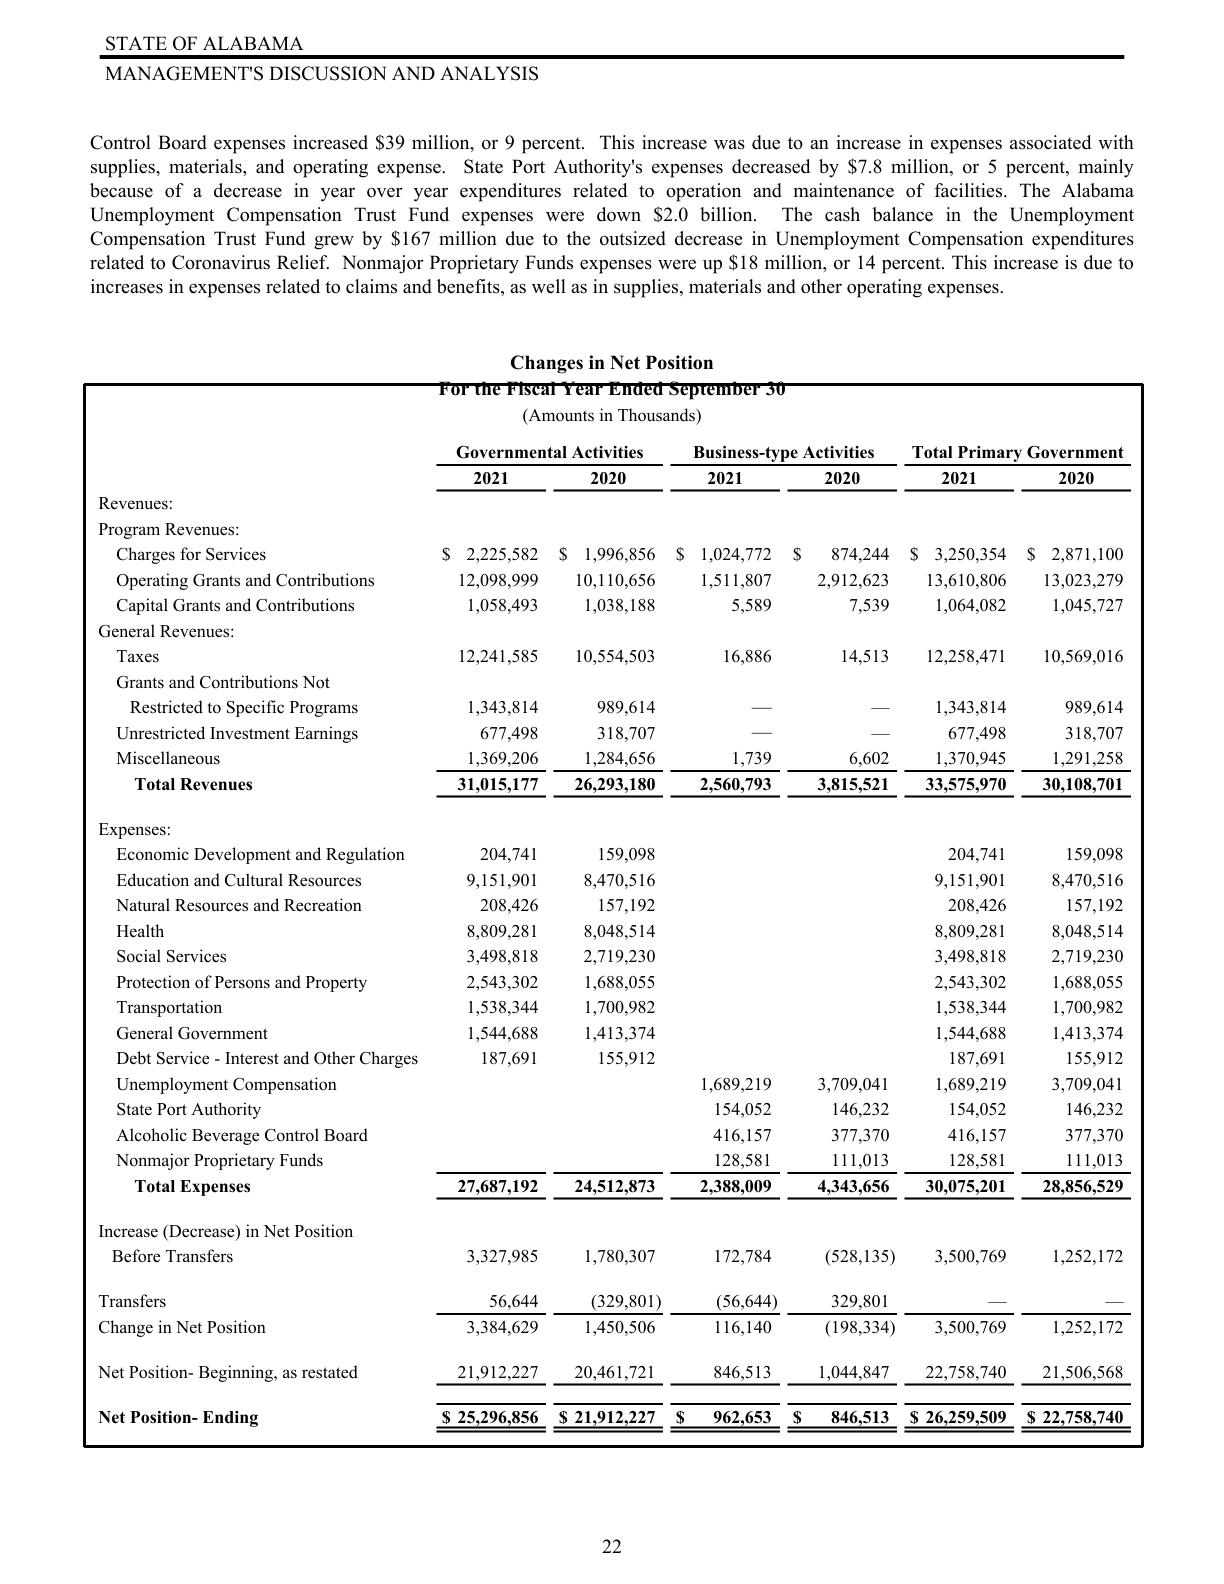

(1584, 1224, 3)
[[84, 384, 1142, 1446]]


In [150]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image
import requests
import cv2
import numpy as np
import csv
import tabula
# Load the image
image_path = "/content/page-25.png"
image = Image.open(image_path)

processor = DetrImageProcessor.from_pretrained("TahaDouaji/detr-doc-table-detection")
model = DetrForObjectDetection.from_pretrained("TahaDouaji/detr-doc-table-detection")

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

tables=[]
bbox = []

# convert outputs (bounding boxes and class logits) to COCO API
# let's only keep detections with score > 0.9
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

# Convert PIL image to OpenCV format
image_cv2 = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    class_label = model.config.id2label[label.item()]

    # Draw rectangle around the detected object
    x_min, y_min, x_max, y_max = map(int, box)
    table= [(x_min-10), (y_min-10), (x_max+20), (y_max+20)]
    bb=[table[1]-200,table[0]-50,table[3]-200,table[2]-50]
    cv2.rectangle(image_cv2, (x_min-10, y_min-10), (x_max+20, y_max+20), (0, 0, 0), 2)
    tables.append(table)
    bbox.append(bb)

    print(f"Detected {class_label} with confidence {round(score.item(), 3)} at location {box}")

# Display the image with rectangles
cv2_imshow(image_cv2)
print(image_cv2.shape)
print(tables)


In [123]:
import cv2
import numpy as np

class TableExtractor:

    def __init__(self, image):
        self.image= image

    def execute(self):
        # self.read_image()
        # self.store_process_image("0_original.jpg", self.image)
        self.convert_image_to_grayscale()
        # self.store_process_image("1_grayscaled.jpg", self.grayscale_image)
        self.threshold_image()
        # self.store_process_image("3_thresholded.jpg", self.thresholded_image)
        self.invert_image()
        # self.store_process_image("4_inverteded.jpg", self.inverted_image)
        self.dilate_image()
        # self.store_process_image("5_dialateded.jpg", self.dilated_image)
        self.find_contours()
        # self.store_process_image("6_all_contours.jpg", self.image_with_all_contours)
        self.filter_contours_and_leave_only_rectangles()
        # self.store_process_image("7_only_rectangular_contours.jpg", self.image_with_only_rectangular_contours)
        self.find_largest_contour_by_area()
        # self.store_process_image("8_contour_with_max_area.jpg", self.image_with_contour_with_max_area)
        self.order_points_in_the_contour_with_max_area()
        # self.store_process_image("9_with_4_corner_points_plotted.jpg", self.image_with_points_plotted)
        self.calculate_new_width_and_height_of_image()
        # self.apply_perspective_transform()
        self.store_process_image("10_perspective_corrected.jpg", self.perspective_corrected_image)
        self.add_10_percent_padding()
        self.store_process_image("11_perspective_corrected_with_padding.jpg", self.perspective_corrected_image_with_padding)
        return self.perspective_corrected_image_with_padding

    def read_image(self):
        self.image = cv2.imread(self.image_path)

    def convert_image_to_grayscale(self):
        self.grayscale_image = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)

    def blur_image(self):
        self.blurred_image = cv2.blur(self.grayscale_image, (5, 5))

    def threshold_image(self):
        self.thresholded_image = cv2.threshold(self.grayscale_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

    def invert_image(self):
        self.inverted_image = cv2.bitwise_not(self.thresholded_image)

    def dilate_image(self):
        self.dilated_image = cv2.dilate(self.inverted_image, None, iterations=2)

    def find_contours(self):
        self.contours, self.hierarchy = cv2.findContours(self.dilated_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        self.image_with_all_contours = self.image.copy()
        cv2.drawContours(self.image_with_all_contours, self.contours, -1, (0, 255, 0), 3)

    def filter_contours_and_leave_only_rectangles(self):
        self.rectangular_contours = []
        for contour in self.contours:
            peri = cv2.arcLength(contour, True)
            approx = cv2.approxPolyDP(contour, 0.02 * peri, True)
            if len(approx) == 4:
                self.rectangular_contours.append(approx)
        self.image_with_only_rectangular_contours = self.image.copy()
        cv2.drawContours(self.image_with_only_rectangular_contours, self.rectangular_contours, -1, (0, 255, 0), 3)

    def find_largest_contour_by_area(self):
        max_area = 0
        self.contour_with_max_area = None
        for contour in self.rectangular_contours:
            area = cv2.contourArea(contour)
            if area > max_area:
                max_area = area
                self.contour_with_max_area = contour
        self.image_with_contour_with_max_area = self.image.copy()
        cv2.drawContours(self.image_with_contour_with_max_area, [self.contour_with_max_area], -1, (0, 255, 0), 3)

    def order_points_in_the_contour_with_max_area(self):
        self.contour_with_max_area_ordered = self.order_points(self.contour_with_max_area)
        self.image_with_points_plotted = self.image.copy()
        for point in self.contour_with_max_area_ordered:
            point_coordinates = (int(point[0]), int(point[1]))
            self.image_with_points_plotted = cv2.circle(self.image_with_points_plotted, point_coordinates, 10, (0, 0, 255), -1)

    def calculate_new_width_and_height_of_image(self):
        existing_image_width = self.image.shape[1]
        existing_image_width_reduced_by_10_percent = int(existing_image_width * 0.9)

        distance_between_top_left_and_top_right = self.calculateDistanceBetween2Points(self.contour_with_max_area_ordered[0], self.contour_with_max_area_ordered[1])
        distance_between_top_left_and_bottom_left = self.calculateDistanceBetween2Points(self.contour_with_max_area_ordered[0], self.contour_with_max_area_ordered[3])

        aspect_ratio = distance_between_top_left_and_bottom_left / distance_between_top_left_and_top_right

        self.new_image_width = existing_image_width_reduced_by_10_percent
        self.new_image_height = int(self.new_image_width * aspect_ratio)

    def apply_perspective_transform(self):
        pts1 = np.float32(self.contour_with_max_area_ordered)
        pts2 = np.float32([[0, 0], [self.new_image_width, 0], [self.new_image_width, self.new_image_height], [0, self.new_image_height]])
        matrix = cv2.getPerspectiveTransform(pts1, pts2)
        self.perspective_corrected_image = cv2.warpPerspective(self.image, matrix, (self.new_image_width, self.new_image_height))

    def add_10_percent_padding(self):
        image_height = self.image.shape[0]
        padding = int(image_height * 0.1)
        self.perspective_corrected_image_with_padding = cv2.copyMakeBorder(self.perspective_corrected_image, padding, padding, padding, padding, cv2.BORDER_CONSTANT, value=[255, 255, 255])

    def draw_contours(self):
        self.image_with_contours = self.image.copy()
        cv2.drawContours(self.image_with_contours,  [ self.contour_with_max_area ], -1, (0, 255, 0), 1)

    def calculateDistanceBetween2Points(self, p1, p2):
        dis = ((p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2) ** 0.5
        return dis

    def order_points(self, pts):
        # initialzie a list of coordinates that will be ordered
        # such that the first entry in the list is the top-left,
        # the second entry is the top-right, the third is the
        # bottom-right, and the fourth is the bottom-left
        pts = pts.reshape(4, 2)
        rect = np.zeros((4, 2), dtype="float32")

        # the top-left point will have the smallest sum, whereas
        # the bottom-right point will have the largest sum
        s = pts.sum(axis=1)
        rect[0] = pts[np.argmin(s)]
        rect[2] = pts[np.argmax(s)]

        # now, compute the difference between the points, the
        # top-right point will have the smallest difference,
        # whereas the bottom-left will have the largest difference
        diff = np.diff(pts, axis=1)
        rect[1] = pts[np.argmin(diff)]
        rect[3] = pts[np.argmax(diff)]

        # return the ordered coordinates
        return rect

    def store_process_image(self, file_name, image):
        path = "./process_images/table_extractor/" + file_name
        cv2_imshow(image)



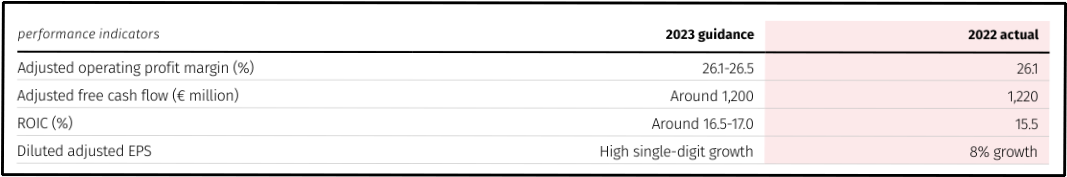

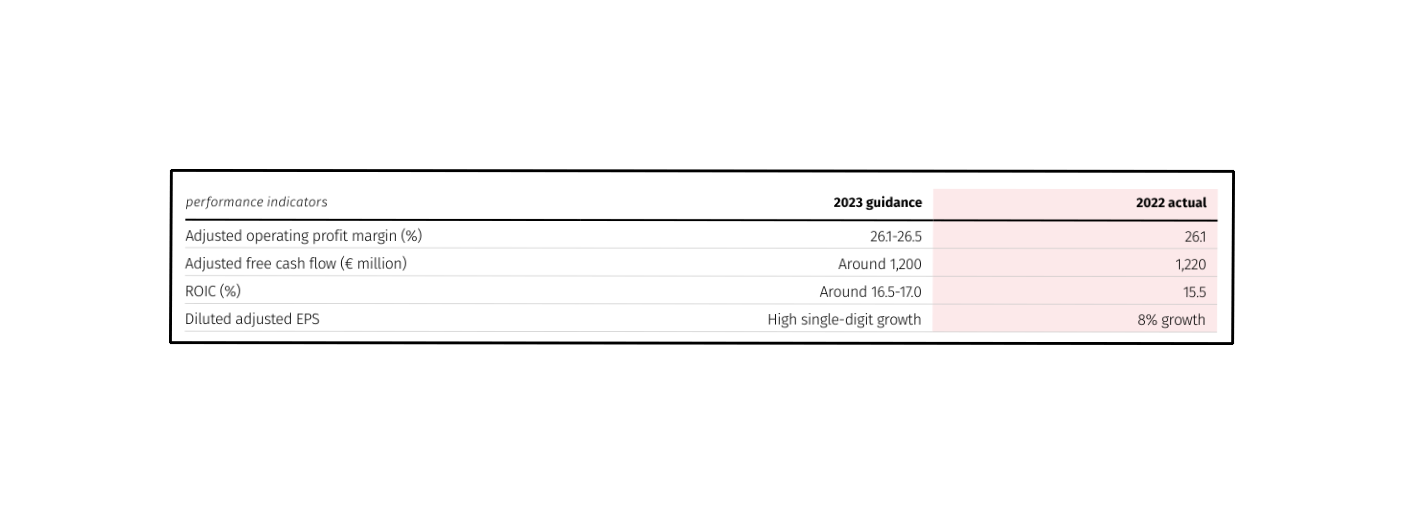

True

In [125]:
# path_to_image = "/content/page-9.png"
table_extractor = TableExtractor(image_cv2)
perspective_corrected_image = table_extractor.execute()
# cv2_imshow(perspective_corrected_image)
cv2.imwrite("output.jpg",perspective_corrected_image)

In [ ]:
pip install img2pdf

In [ ]:
import img2pdf
img_path="/content/output.jpg"
# opening image
image = Image.open(img_path)

# converting into chunks using img2pdf
pdf_bytes = img2pdf.convert(image.filename)

pdf_path="output.pdf"
# opening or creating pdf file
file = open(pdf_path, "wb")

# writing pdf files with chunks
file.write(pdf_bytes)

# closing image file
image.close()

# closing pdf file
file.close()

# output
print("Successfully made pdf file")

In [ ]:
pip install tabula-py

In [ ]:
import tabula
obj = tabula.read_pdf("/content/output.pdf")
print(obj)

In [119]:
import cv2
import numpy as np

class TableLinesRemover:

    def __init__(self, image):
        self.image = image

    def execute(self):
        self.grayscale_image()
        self.store_process_image("0_grayscaled.jpg", self.grey)
        self.threshold_image()
        self.store_process_image("1_thresholded.jpg", self.thresholded_image)
        self.invert_image()
        self.store_process_image("2_inverted.jpg", self.inverted_image)
        self.erode_vertical_lines()
        self.store_process_image("3_erode_vertical_lines.jpg", self.vertical_lines_eroded_image)
        self.erode_horizontal_lines()
        self.store_process_image("4_erode_horizontal_lines.jpg", self.horizontal_lines_eroded_image)
        self.combine_eroded_images()
        self.store_process_image("5_combined_eroded_images.jpg", self.combined_image)
        self.dilate_combined_image_to_make_lines_thicker()
        self.store_process_image("6_dilated_combined_image.jpg", self.combined_image_dilated)
        self.subtract_combined_and_dilated_image_from_original_image()
        self.store_process_image("7_image_without_lines.jpg", self.image_without_lines)
        self.remove_noise_with_erode_and_dilate()
        self.store_process_image("8_image_without_lines_noise_removed.jpg", self.image_without_lines_noise_removed)
        return self.image_without_lines_noise_removed

    def grayscale_image(self):
        self.grey = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)

    def threshold_image(self):
        self.thresholded_image = cv2.threshold(self.grey, 215, 255, cv2.THRESH_BINARY)[1]

    def invert_image(self):
        self.inverted_image = cv2.bitwise_not(self.thresholded_image)

    def erode_vertical_lines(self):
        hor = np.array([[1,1,1,1,1,1]])
        self.vertical_lines_eroded_image = cv2.erode(self.inverted_image, hor, iterations=10)
        self.vertical_lines_eroded_image = cv2.dilate(self.vertical_lines_eroded_image, hor, iterations=15)

    def erode_horizontal_lines(self):
        ver = np.array([[1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1]])
        self.horizontal_lines_eroded_image = cv2.erode(self.inverted_image, ver, iterations=10)
        self.horizontal_lines_eroded_image = cv2.dilate(self.horizontal_lines_eroded_image, ver, iterations=15)

    def combine_eroded_images(self):
        self.combined_image = cv2.add(self.vertical_lines_eroded_image, self.horizontal_lines_eroded_image)

    def dilate_combined_image_to_make_lines_thicker(self):
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
        self.combined_image_dilated = cv2.dilate(self.combined_image, kernel, iterations=5)

    def subtract_combined_and_dilated_image_from_original_image(self):
        self.image_without_lines = cv2.subtract(self.inverted_image, self.combined_image_dilated)

    def remove_noise_with_erode_and_dilate(self):
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
        self.image_without_lines_noise_removed = cv2.erode(self.image_without_lines, kernel, iterations=1)
        self.image_without_lines_noise_removed = cv2.dilate(self.image_without_lines_noise_removed, kernel, iterations=2)

    def store_process_image(self, file_name, image):
        path = "./process_images/table_lines_remover/" + file_name
        cv2_imshow(image)

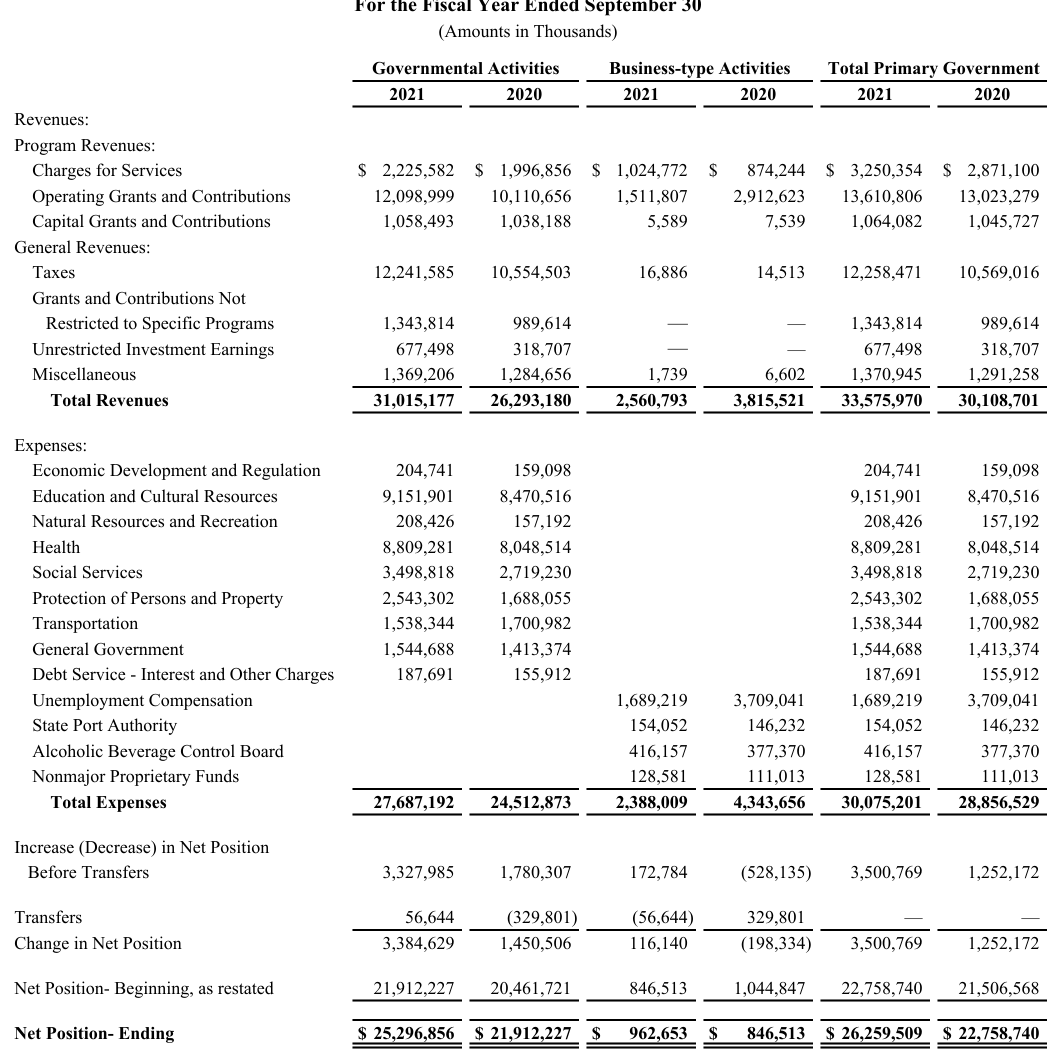

In [156]:
def extract_bounding_box(image, bbox):
    x1, y1, x2, y2 = bbox
    height=abs(y2-y1)
    width=abs(x2-x1)
    extracted_image = image[y1:y1+height, x1:x1+width]
    return extracted_image

image_path = "/content/page-25.png"
image = cv2.imread(image_path)
ext_image= extract_bounding_box(image,tables[0])
cv2_imshow(ext_image)

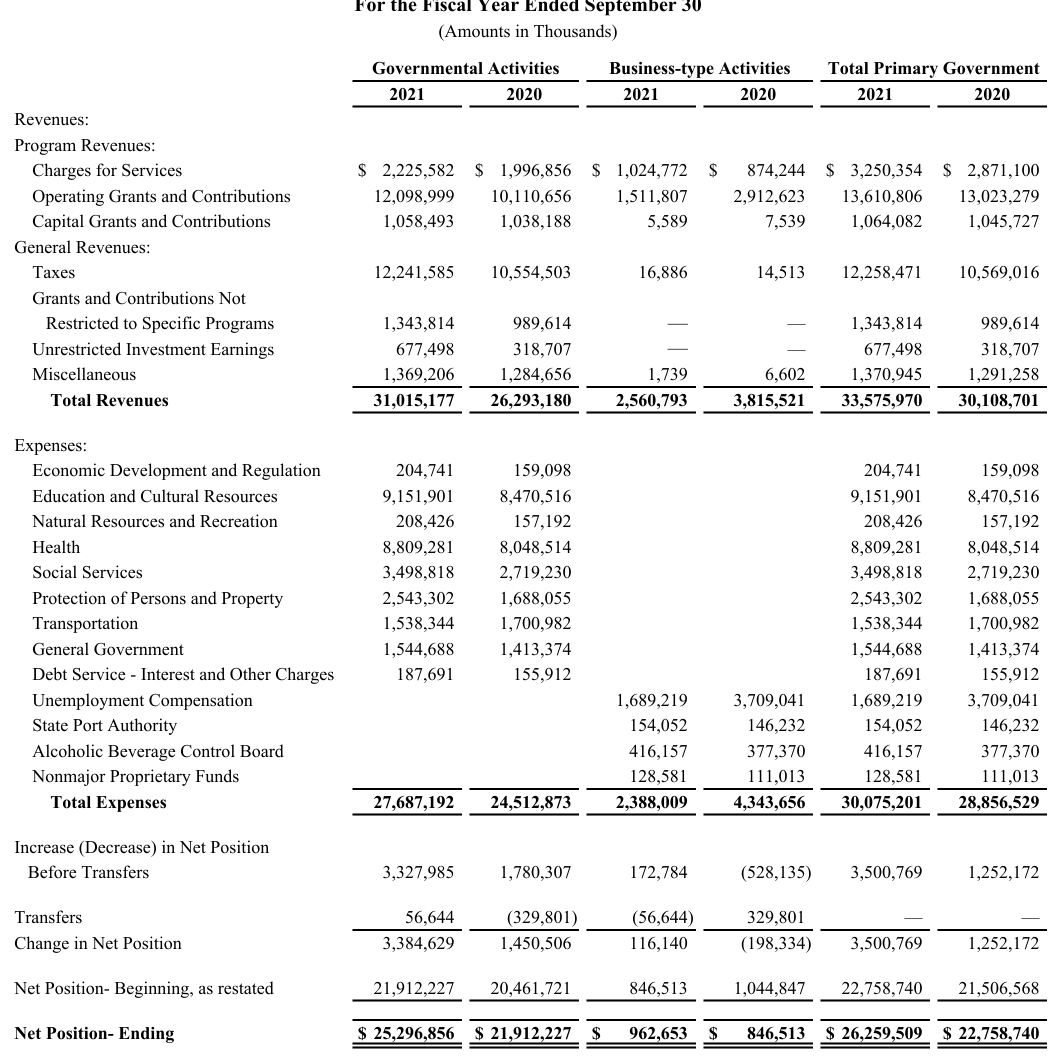

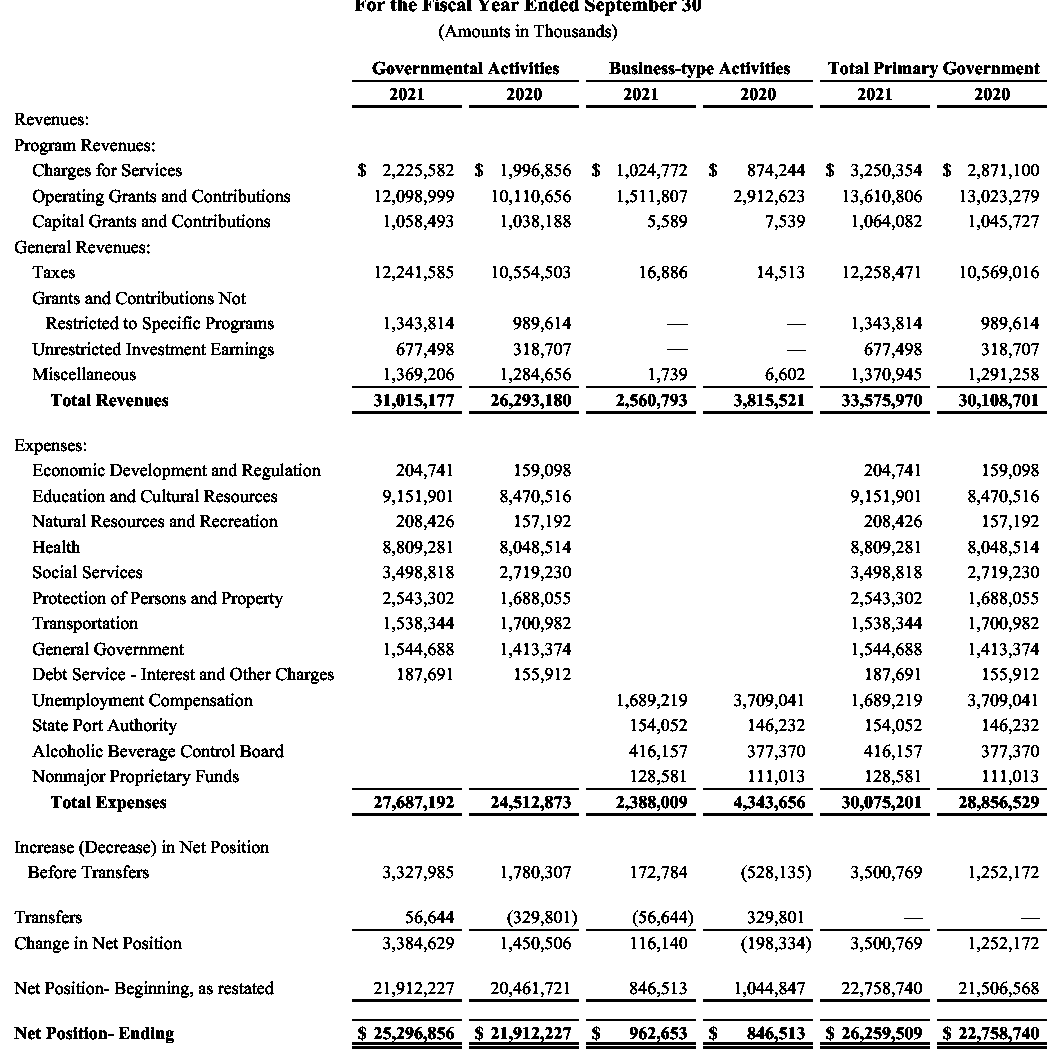

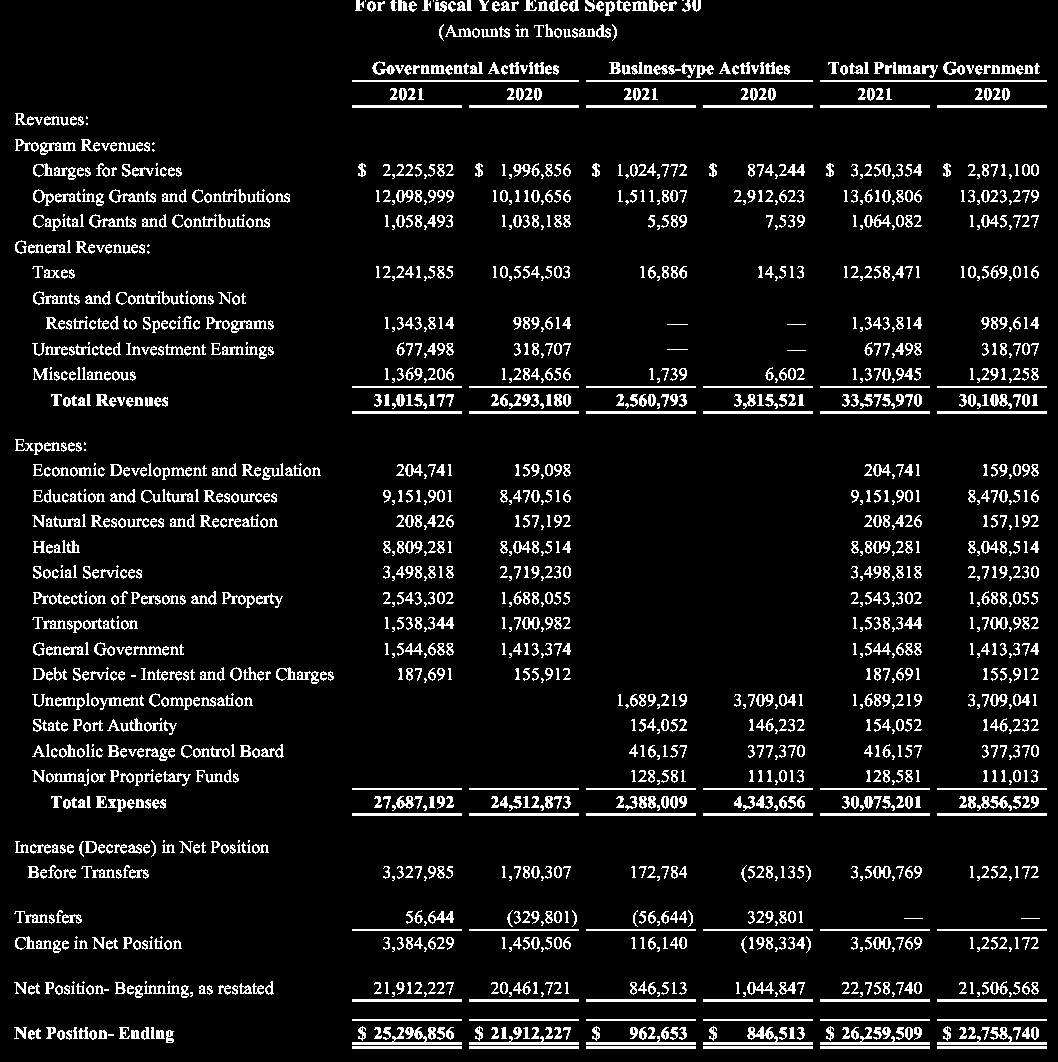

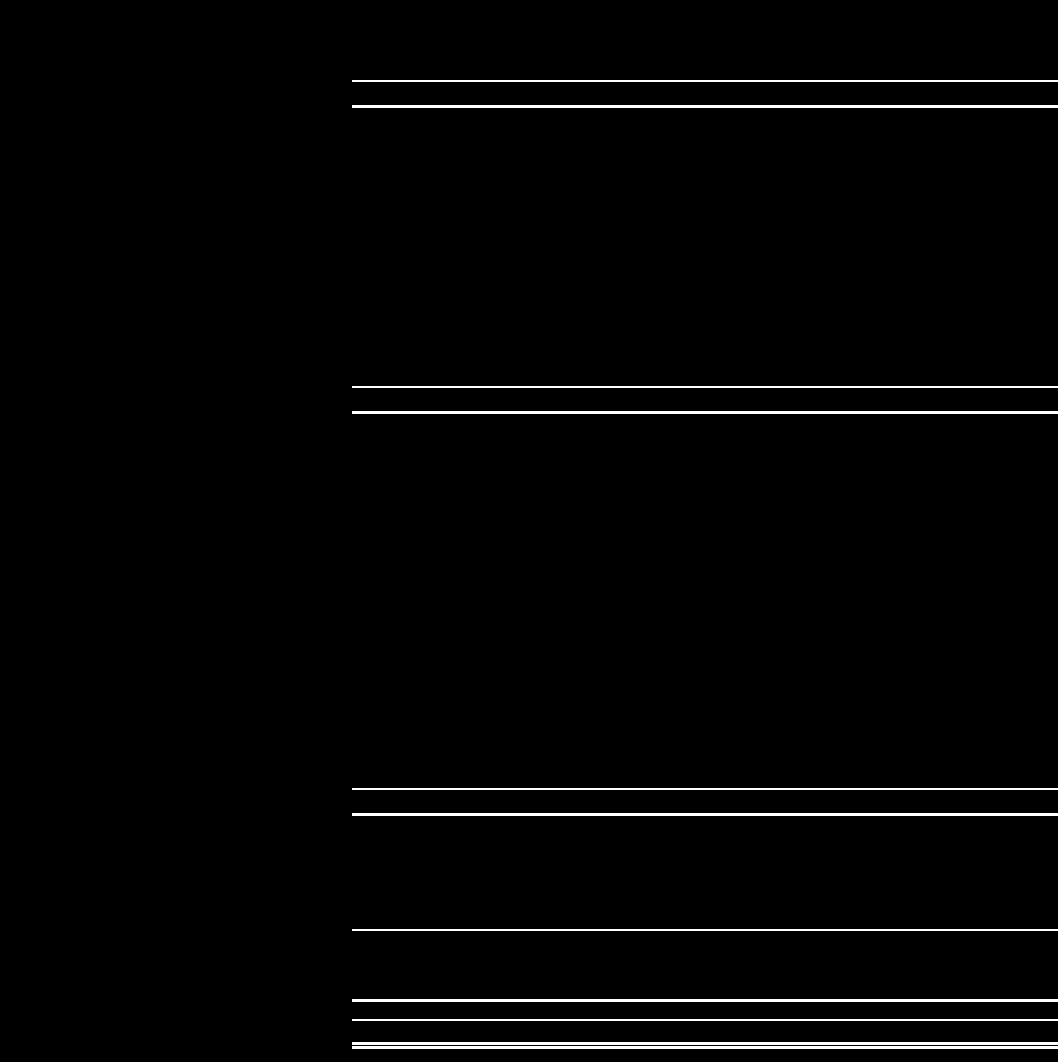

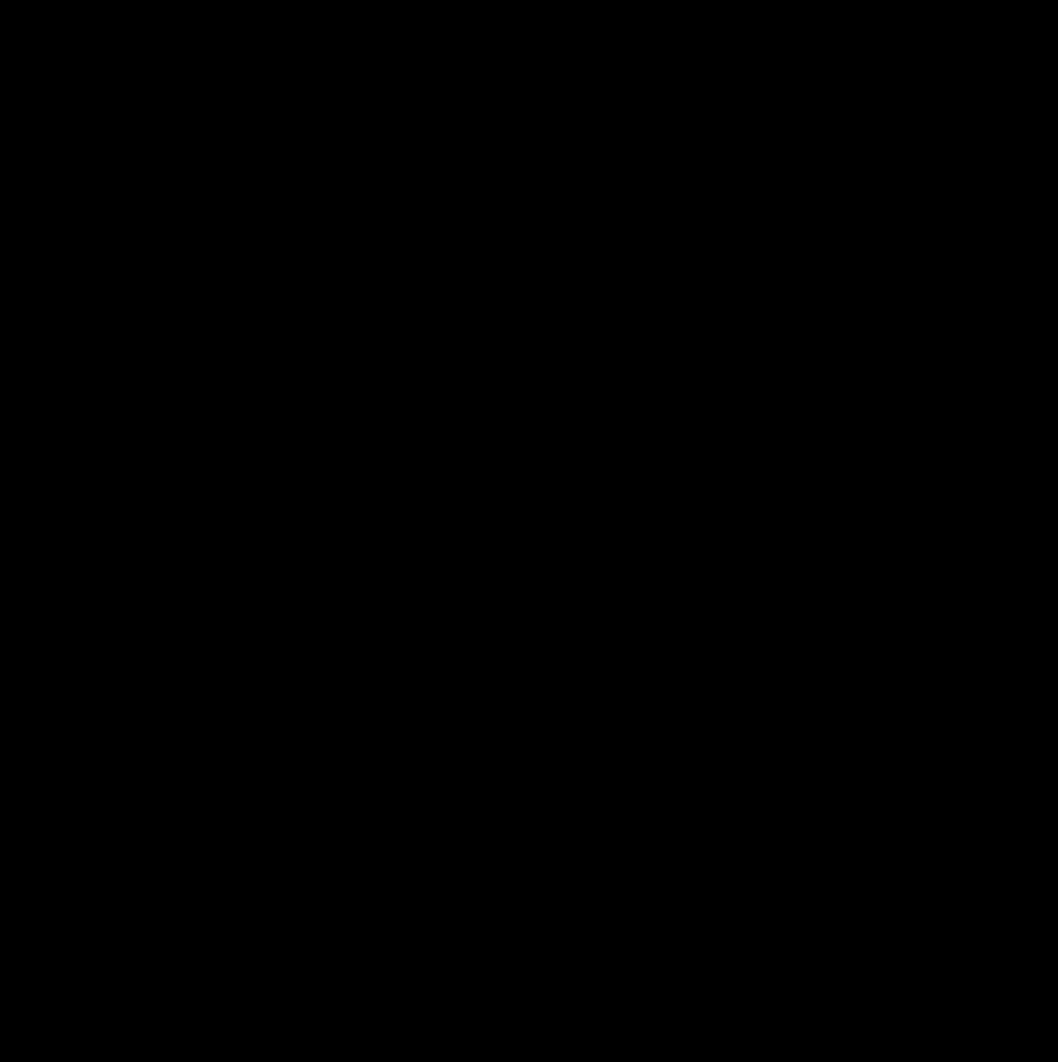

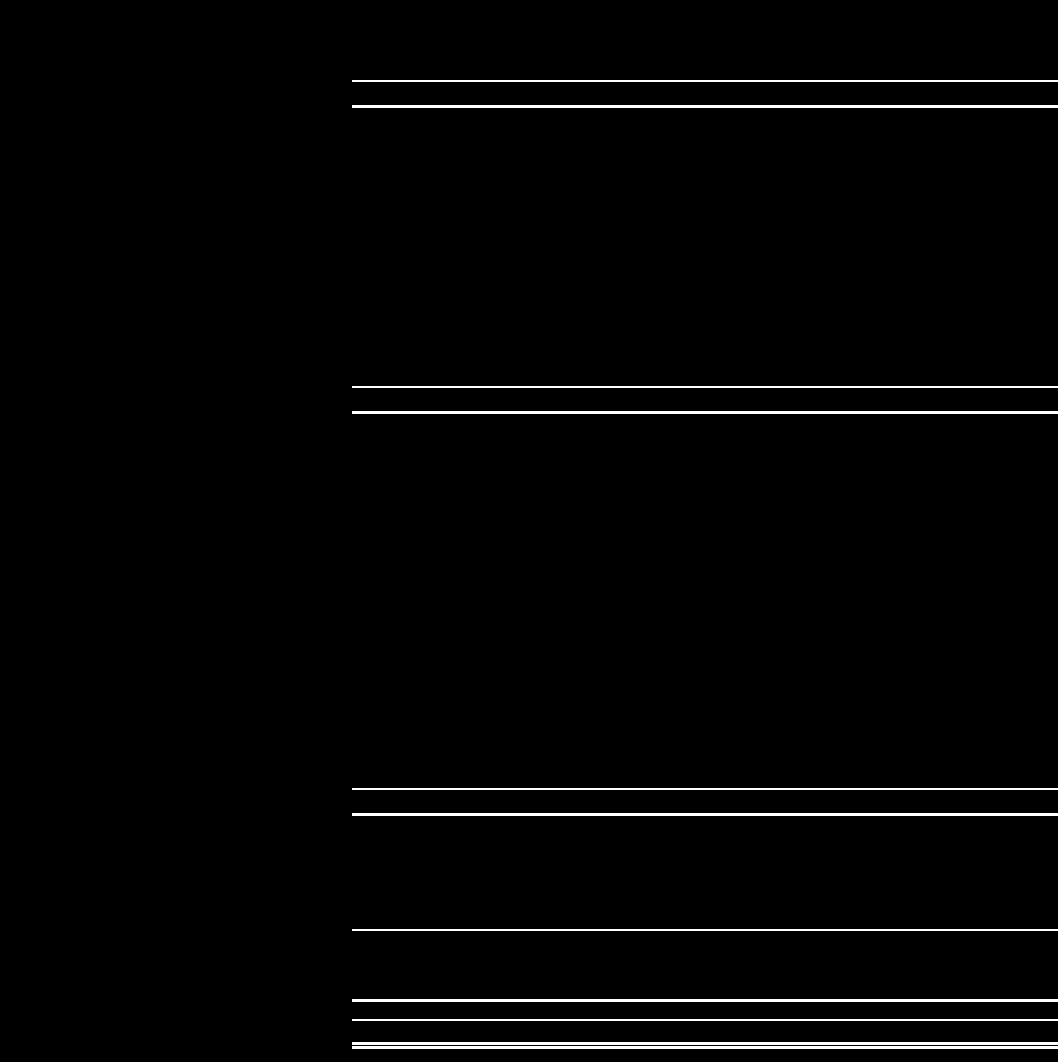

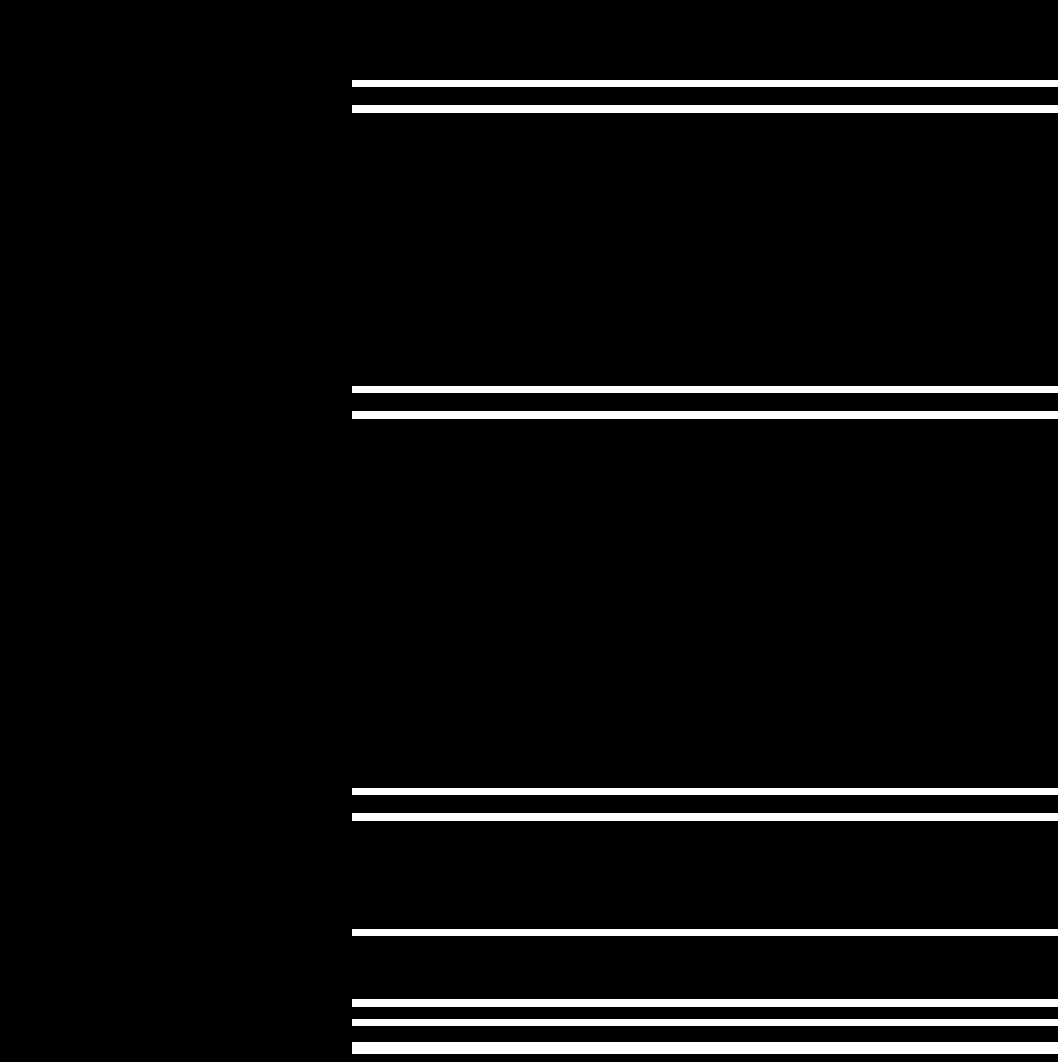

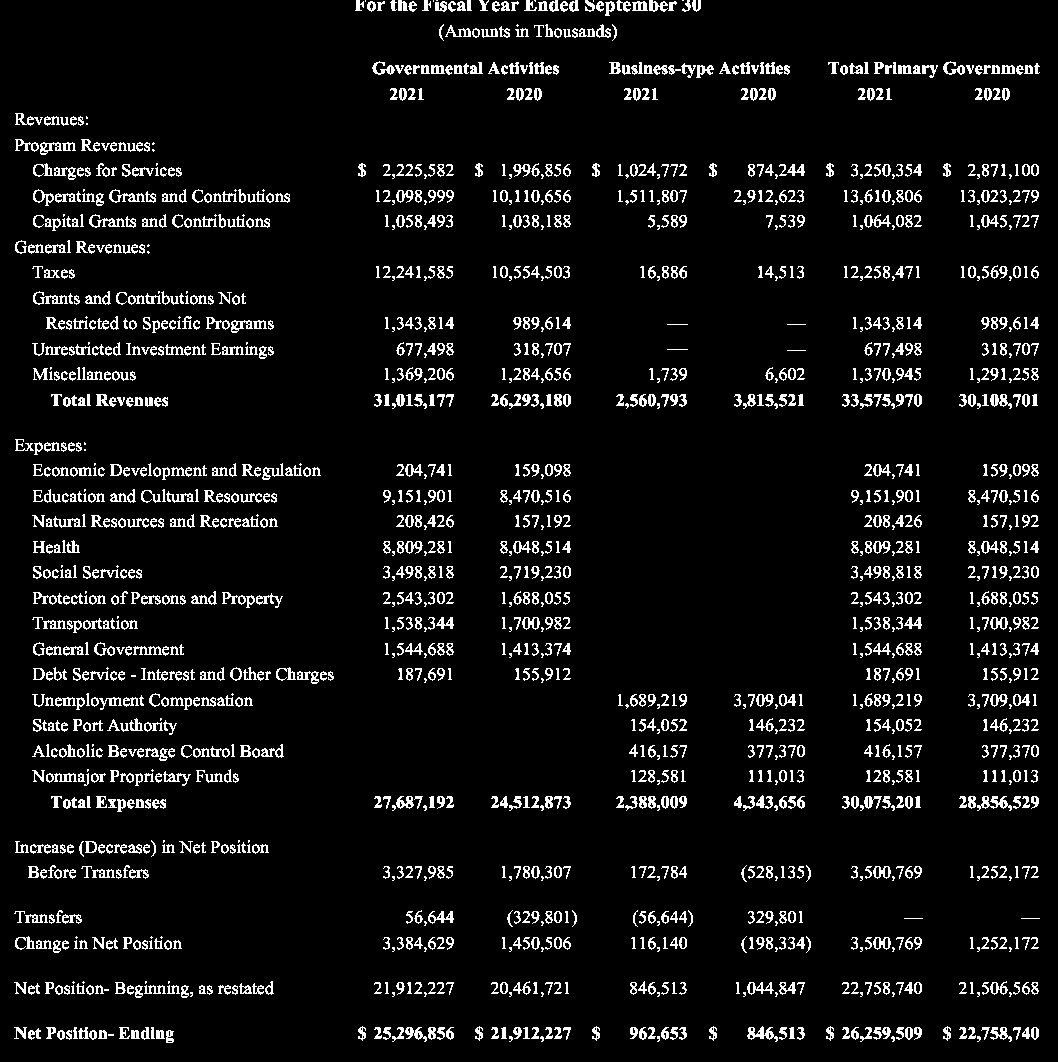

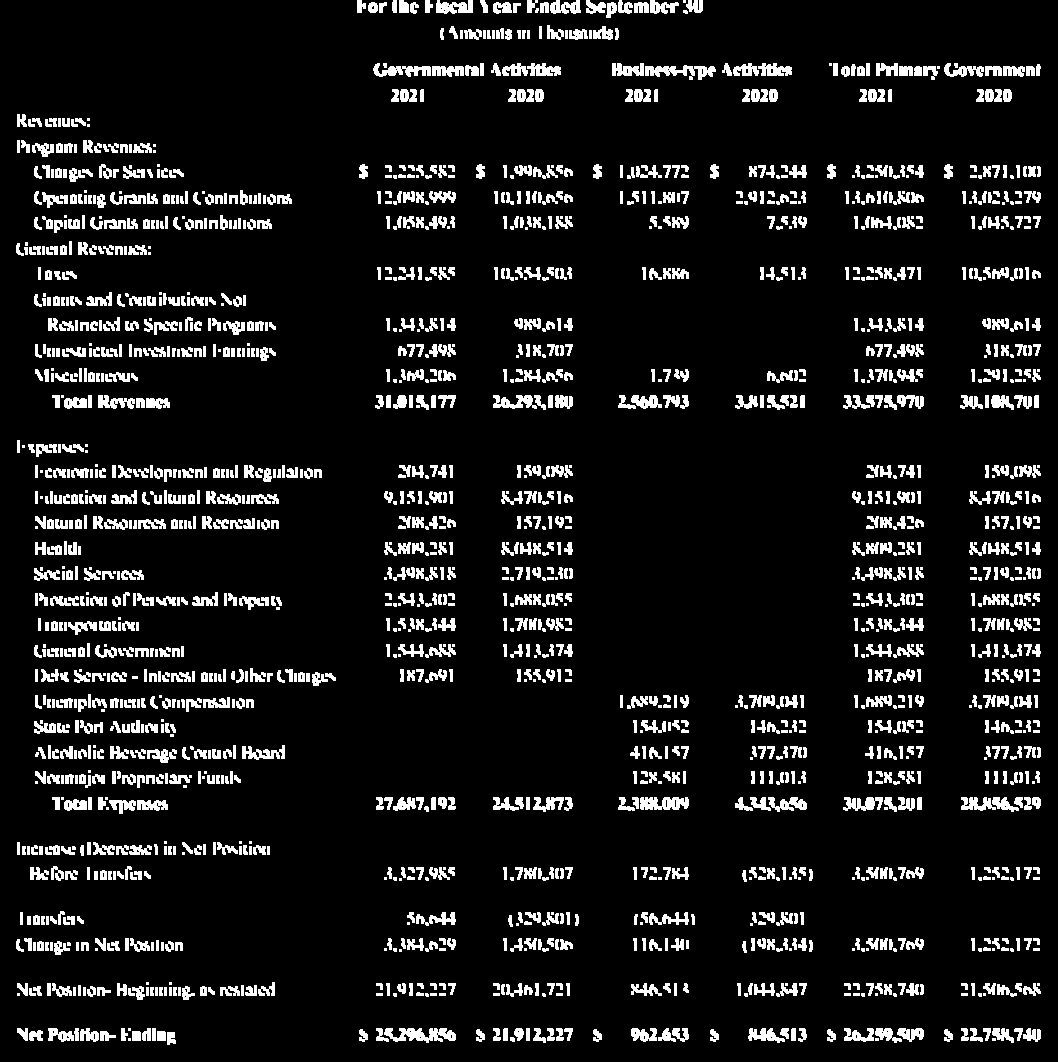

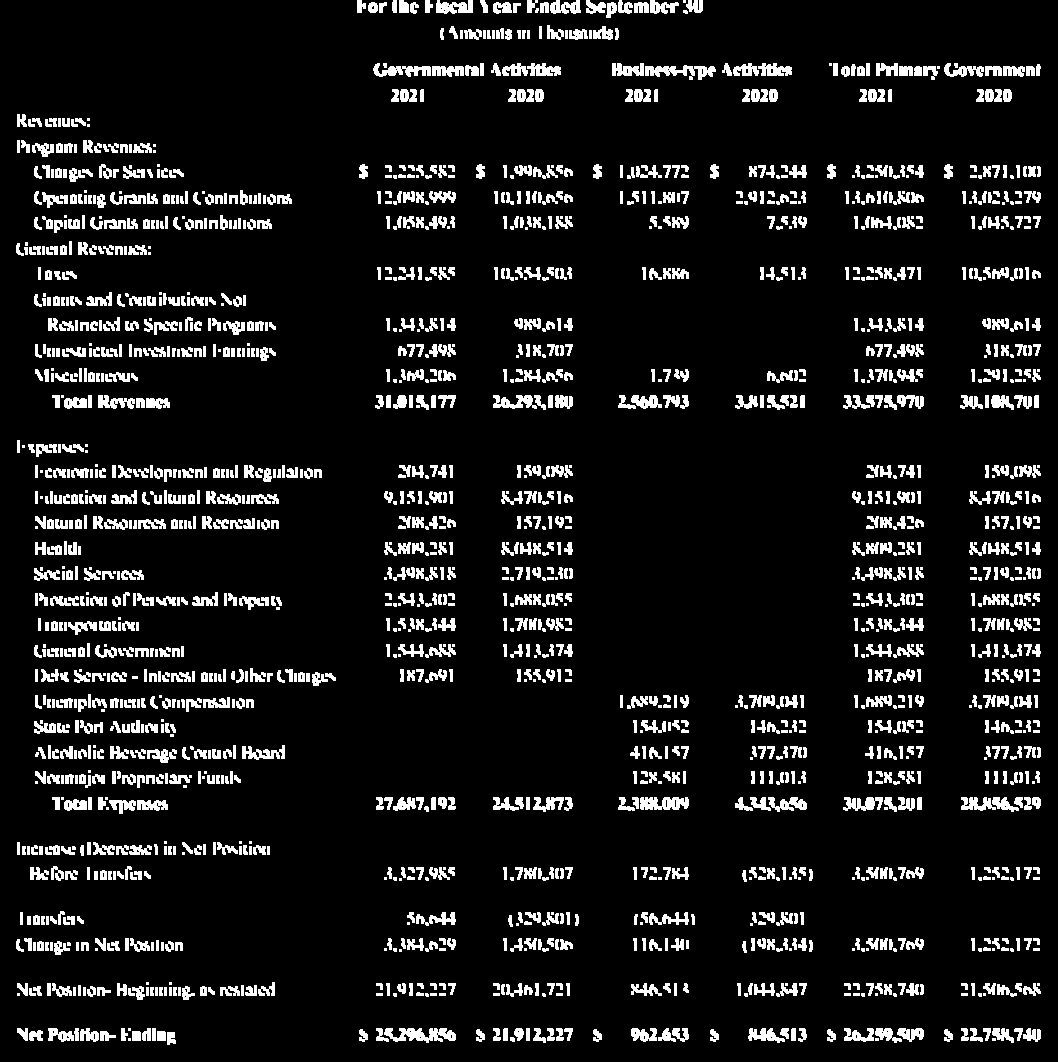

In [157]:
lines_remover = TableLinesRemover(ext_image)
image_without_lines = lines_remover.execute()
cv2_imshow(image_without_lines)

In [ ]:

pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 13.2 MB/s eta 0:00:00


In [ ]:
# installation
!sudo apt install tesseract-ocr
!pip install pytesseract


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 16 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,452 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [164]:
import cv2
import numpy as np
import subprocess
import os
import easyocr
import numpy as np
from PIL import Image, ImageDraw



class OcrToTableTool:

    def __init__(self, image, original_image):
        self.thresholded_image = image
        self.original_image = original_image
        self.reader = easyocr.Reader(['en'])
        self.table_contents={}

    def execute(self):
        self.dilate_image()
        # self.store_process_image('0_dilated_image.jpg', self.dilated_image)
        self.find_contours()
        # self.store_process_image('1_contours.jpg', self.image_with_contours_drawn)
        self.convert_contours_to_bounding_boxes()
        # self.store_process_image('2_bounding_boxes.jpg', self.image_with_all_bounding_boxes)

        self.mean_height = self.get_mean_height_of_bounding_boxes()
        self.mean_width =self.get_mean_width_of_bounding_boxes()

        self.sort_bounding_boxes_by_y_coordinate()
        self.club_all_bounding_boxes_by_similar_y_coordinates_into_rows()
        self.sort_all_rows_by_x_coordinate()

        self.sort_bounding_boxes_by_x_coordinate()
        self.club_all_bounding_boxes_by_similar_x_coordinates_into_columns()
        self.sort_all_columns_by_y_coordinate()

        self.create_ocr_dict(self.rows)

        self.crop_each_bounding_box_and_ocr_rows()

        self.crop_each_bounding_box_and_ocr_cols()
        # self.generate_csv_file(name = "columns")
        self.create_final_table()
        self.generate_csv_file()

    def threshold_image(self):
        return cv2.threshold(self.grey_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

    def convert_image_to_grayscale(self):
        return cv2.cvtColor(self.image, self.dilated_image)

    def dilate_image(self):
        kernel_to_remove_gaps_between_words = np.array([
                [1,1,1,1,1,1,1],
               [1,1,1,1,1,1,1]
        ])
        self.dilated_image = cv2.dilate(self.thresholded_image, kernel_to_remove_gaps_between_words, iterations=2)
        simple_kernel = np.ones((2,2), np.uint8)
        self.dilated_image = cv2.dilate(self.dilated_image, simple_kernel, iterations=3)

    def find_contours(self):
        result = cv2.findContours(self.dilated_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        self.contours = result[0]
        self.image_with_contours_drawn = self.original_image.copy()
        cv2.drawContours(self.image_with_contours_drawn, self.contours, -1, (0, 255, 0), 3)

    def approximate_contours(self):
        self.approximated_contours = []
        for contour in self.contours:
            approx = cv2.approxPolyDP(contour, 3, True)
            self.approximated_contours.append(approx)

    def draw_contours(self):
        self.image_with_contours = self.original_image.copy()
        cv2.drawContours(self.image_with_contours, self.approximated_contours, -1, (0, 255, 0), 5)

    def convert_contours_to_bounding_boxes(self):
        self.bounding_boxes = []
        self.image_with_all_bounding_boxes = self.original_image.copy()
        for contour in self.contours:
            x, y, w, h = cv2.boundingRect(contour)
            self.bounding_boxes.append((x, y, w, h))
            self.image_with_all_bounding_boxes = cv2.rectangle(self.image_with_all_bounding_boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)

    def get_mean_height_of_bounding_boxes(self):
        heights = []
        for bounding_box in self.bounding_boxes:
            x, y, w, h = bounding_box
            heights.append(h)
        return np.mean(heights)

    def get_mean_width_of_bounding_boxes(self):
      widths = []
      for bounding_box in self.bounding_boxes:
          x, y, w, h = bounding_box
          widths.append(w)
      return np.mean(widths)

    def sort_bounding_boxes_by_y_coordinate(self):
        self.bounding_boxes = sorted(self.bounding_boxes, key=lambda x: x[1])

    def sort_bounding_boxes_by_x_coordinate(self):
        self.bounding_boxes = sorted(self.bounding_boxes, key=lambda x: x[0])

    def club_all_bounding_boxes_by_similar_y_coordinates_into_rows(self):
        self.rows = []
        half_of_mean_height = self.mean_height / 2
        current_row = [ self.bounding_boxes[0] ]
        for bounding_box in self.bounding_boxes[1:]:
            current_bounding_box_y = bounding_box[1]
            previous_bounding_box_y = current_row[-1][1]
            distance_between_bounding_boxes = abs(current_bounding_box_y - previous_bounding_box_y)
            if distance_between_bounding_boxes <= half_of_mean_height:
                current_row.append(bounding_box)
            else:
                self.rows.append(current_row)
                current_row = [ bounding_box ]
        self.rows.append(current_row)

    def club_all_bounding_boxes_by_similar_x_coordinates_into_columns(self):
      self.columns = []
      half_of_mean_width = self.mean_width / 3
      current_column = [self.bounding_boxes[0]]
      for bounding_box in self.bounding_boxes[1:]:
          current_bounding_box_x = bounding_box[0]
          previous_bounding_box_x = current_column[-1][0]
          distance_between_bounding_boxes = abs(current_bounding_box_x - previous_bounding_box_x)
          if distance_between_bounding_boxes <= half_of_mean_width:
              current_column.append(bounding_box)
          else:
              self.columns.append(current_column)
              current_column = [bounding_box]
      self.columns.append(current_column)


    def sort_all_rows_by_x_coordinate(self):
        for row in self.rows:
            row.sort(key=lambda x: x[0])
        print(self.rows)

    def sort_all_columns_by_y_coordinate(self):
        for column in self.columns:
            column.sort(key=lambda x: x[1])
        print(self.columns)
        print(len(self.columns))

    def create_ocr_dict(self,table):

        image_number = 0
        for row in table:
            for bounding_box in row:
                x, y, w, h = bounding_box
                print(bounding_box)
                if h > 5:
                  y = y - 5
                  cv2_imshow(self.original_image)

                  cropped_image = self.original_image[y:y+h+2, x:x+w]
                  image_slice_path = f"cells_folder/cell{image_number}.jpg"
                  cv2_imshow(cropped_image)
                  # grey_image= cv2.cvtColor(cropped_image,cv2.COLOR_BGR2GRAY)
                  # Create the sharpening kernel
                  kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
                  # Apply the sharpening kernel to the image using filter2D
                  sharpened = cv2.filter2D(cropped_image, -1, kernel)
                  thresh = cv2.threshold(sharpened, 200, 255, cv2.THRESH_BINARY)[1]

                  # cv2_imshow(thresh)

                  cv2.imwrite(image_slice_path,thresh)

                  results_from_ocr = self.get_result_from_easyocr(image_slice_path)
                  image_number += 1

                  self.table_contents[str(bounding_box)]=results_from_ocr
        print(self.table_contents)



    def crop_each_bounding_box_and_ocr_rows(self):
        if not os.path.exists('cells_folder'):
          os.mkdir("cells_folder")
        self.row_table = []
        current_row = []
        image_number = 0
        for row in self.rows:
            for bounding_box in row:
                x, y, w, h = bounding_box
                if h > 5:
                  y = y - 5
                  # cropped_image = self.original_image[y:y+h+2, x:x+w]
                  # image_slice_path = f"cells_folder/cell{image_number}.jpg"

                  # grey_image= cv2.cvtColor(cropped_image,cv2.COLOR_BGR2GRAY)
                  # # Create the sharpening kernel
                  # kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
                  # # Apply the sharpening kernel to the image using filter2D
                  # sharpened = cv2.filter2D(grey_image, -1, kernel)
                  # thresh = cv2.threshold(sharpened, 200, 255, cv2.THRESH_BINARY)[1]

                  # cv2_imshow(thresh)

                  # cv2.imwrite(image_slice_path,thresh)

                  # results_from_ocr = self.get_result_from_easyocr(image_slice_path)
                  # print("\""+self.table_contents[str(bounding_box)]+"\"")
                  current_row.append("\""+self.table_contents[str(bounding_box)]+"\"")
                  image_number += 1
            self.row_table.append(current_row)
            current_row = []


    def crop_each_bounding_box_and_ocr_cols(self):
        if not os.path.exists('cells_folder'):
          os.mkdir("cells_folder")
        self.column_table = []
        current_row = []
        image_number = 0
        for row in self.columns:
            for bounding_box in row:
                x, y, w, h = bounding_box
                if h > 5:
                  y = y - 5
                  # cropped_image = self.original_image[y:y+h+2, x:x+w]
                  # image_slice_path = f"cells_folder/cell{image_number}.jpg"

                  # grey_image= cv2.cvtColor(cropped_image,cv2.COLOR_BGR2GRAY)
                  # # Create the sharpening kernel
                  # kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
                  # # Apply the sharpening kernel to the image using filter2D
                  # sharpened = cv2.filter2D(grey_image, -1, kernel)
                  # thresh = cv2.threshold(sharpened, 200, 255, cv2.THRESH_BINARY)[1]

                  # cv2_imshow(thresh)

                  # cv2.imwrite(image_slice_path,thresh)

                  # results_from_ocr = self.get_result_from_easyocr(image_slice_path)
                  # print("\""+results_from_ocr+"\"")
                  current_row.append("\""+self.table_contents[str(bounding_box)]+"\"")
                  image_number += 1
            self.column_table.append(current_row)
            current_row = []

    def get_result_from_tersseract(self, image_path):
        import pytesseract
        from pytesseract import Output

        output =  pytesseract.image_to_string(image_path,lang='eng')
        output = output.strip()
        return output

    def get_result_from_easyocr(self, image_path):

      text_coordinates = self.detect_text_blocks(image_path)
      recognition_results = self.reader.recognize(image_path,
                                 horizontal_list=text_coordinates,
                                 free_list=[]
                                 )

      return recognition_results[0][1] if recognition_results else ""

    def generate_csv_file(self):
        print(self.table)
        with open("output.csv", "w") as f:
            for row in self.table:
                f.write(",".join(row) + "\n")

    def store_process_image(self, file_name, image):
        path = "./process_images/ocr_table_tool/" + file_name
        cv2_imshow(image)

    def detect_text_blocks(self,img_path):
      detection_result = self.reader.detect(img_path,
                                 width_ths=0.7,
                                 mag_ratio=1.5
                                 )
      text_coordinates = detection_result[0][0]
      return text_coordinates

    def find_element_position(self,matrix, target_element):
      for row_index, row in enumerate(matrix):
          for col_index, element in enumerate(row):
              if element == target_element:
                  matrix[row_index][col_index]=" "
                  return row_index, col_index
      return None

    def create_final_table(self):
      from itertools import chain
      self.text=list(chain.from_iterable(self.row_table))
      print(self.text)

      row_len=len(self.row_table)
      col_len=len(self.column_table)

      self.table= [[" " for _ in range(col_len)] for _ in range(row_len)]
      # print(self.table)

      for i in self.text:
        row,_ = self.find_element_position(self.row_table,i)
        col,_ = self.find_element_position(self.column_table,i)
        self.table[row][col]=i

      print(self.table)




[[(351, 0, 361, 23)], [(434, 25, 194, 20)], [(367, 63, 203, 19), (606, 63, 195, 22), (823, 63, 227, 22)], [(385, 89, 48, 18), (502, 89, 51, 18), (619, 89, 48, 18), (736, 89, 51, 18), (853, 89, 48, 18), (970, 89, 51, 18)], [(11, 114, 88, 18)], [(11, 140, 154, 22)], [(28, 164, 165, 23), (353, 164, 24, 20), (379, 165, 85, 19), (470, 164, 24, 20), (497, 165, 85, 19), (587, 164, 24, 20), (614, 165, 84, 19), (704, 164, 24, 20), (743, 165, 73, 19), (821, 164, 24, 20), (846, 165, 87, 19), (938, 164, 24, 20), (964, 165, 86, 19)], [(28, 190, 273, 23), (371, 191, 94, 19), (488, 191, 94, 19), (614, 191, 84, 19), (730, 191, 85, 19), (839, 191, 94, 19), (956, 191, 94, 19)], [(28, 215, 253, 23), (380, 216, 84, 19), (497, 216, 85, 19), (643, 216, 55, 18), (761, 216, 55, 19), (848, 216, 84, 19), (965, 216, 85, 19)], [(10, 241, 150, 20)], [(32, 267, 54, 18), (371, 267, 93, 19), (488, 267, 93, 19), (636, 267, 62, 18), (754, 267, 61, 19), (839, 267, 91, 19), (956, 267, 94, 19)], [(28, 292, 227, 20)], [(42

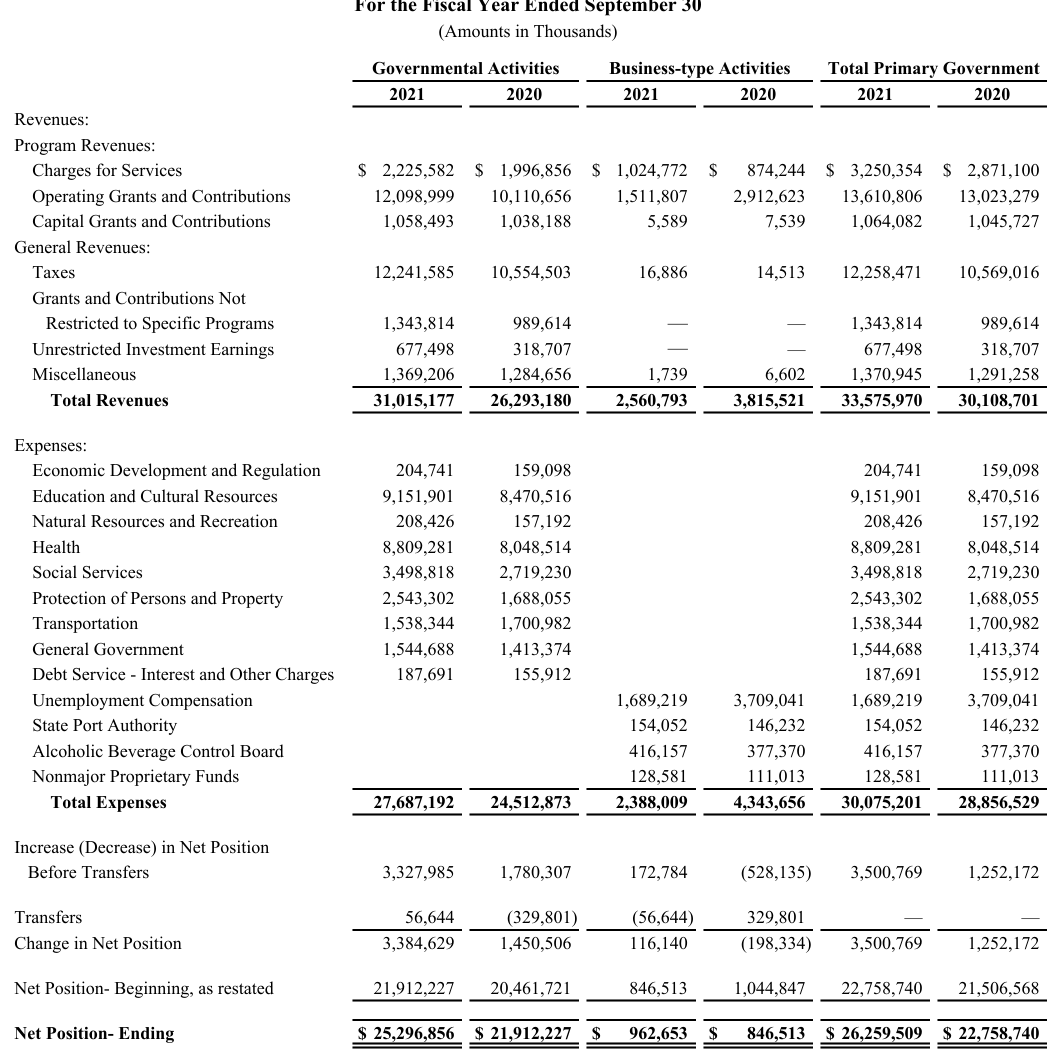

error: ignored

In [165]:
ocr_tool = OcrToTableTool(image_without_lines, ext_image)
ocr_tool.execute()